<a href="https://colab.research.google.com/github/mrekh21/Emotion_Recognition/blob/main/Emotion_Recognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Connect to Kaggle:

In [1]:
from google.colab import files
files.upload()

!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

Saving kaggle.json to kaggle.json


In [2]:
!pip install kaggle

!kaggle competitions download -c challenges-in-representation-learning-facial-expression-recognition-challenge

 87% 249M/285M [00:02<00:00, 112MB/s] 
100% 285M/285M [00:05<00:00, 51.9MB/s]


# Connect to Git:

In [3]:
%cd /content

/content


In [4]:
!git clone https://github.com/mrekh21/Emotion_Recognition

Cloning into 'Emotion_Recognition'...
remote: Enumerating objects: 3, done.
remote: Counting objects: 100% (3/3), done.
remote: Total 3 (delta 0), reused 0 (delta 0), pack-reused 0 (from 0)
Receiving objects: 100% (3/3), done.


In [5]:
# !git config --global user.email "mrekh21@freeuni.edu.ge"
# !git config --global user.name "mrekh21"

# !git add .
# !git commit -m "Your commit message"
# !git push origin main

In [6]:
!ls -l Emotion_Recognition

total 4
-rw-r--r-- 1 root root 21 Jun  2 10:03 README.md


In [7]:
%cd Emotion_Recognition

/content/Emotion_Recognition


In [8]:
!ls -l

total 4
-rw-r--r-- 1 root root 21 Jun  2 10:03 README.md


# Connect to Wandb:

In [9]:
!pip install wandb

In [10]:
import wandb

wandb.login()

<IPython.core.display.Javascript object>

wandb: Logging into wandb.ai. (Learn how to deploy a W&B server locally: https://wandb.me/wandb-server)
wandb: You can find your API key in your browser here: https://wandb.ai/authorize
wandb: Paste an API key from your profile and hit enter:

 ··········


wandb: WARNING If you're specifying your api key in code, ensure this code is not shared publicly.
wandb: WARNING Consider setting the WANDB_API_KEY environment variable, or running `wandb login` from the command line.
wandb: No netrc file found, creating one.
wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc
wandb: Currently logged in as: mrekh21 (mrekh21-free-university-of-tbilisi-) to https://api.wandb.ai. Use `wandb login --relogin` to force relogin


True

# Load datasets:

In [11]:
!unzip -q /content/challenges-in-representation-learning-facial-expression-recognition-challenge.zip -d /content/dataset

In [12]:
!ls /content/dataset

example_submission.csv	fer2013.tar.gz	icml_face_data.csv  test.csv  train.csv


In [13]:
import pandas as pd

train = pd.read_csv('/content/dataset/train.csv')
test = pd.read_csv('/content/dataset/test.csv')

print(train.head())

   emotion                                             pixels
0        0  70 80 82 72 58 58 60 63 54 58 60 48 89 115 121...
1        0  151 150 147 155 148 133 111 140 170 174 182 15...
2        2  231 212 156 164 174 138 161 173 182 200 106 38...
3        4  24 32 36 30 32 23 19 20 30 41 21 22 32 34 21 1...
4        6  4 0 0 0 0 0 0 0 0 0 0 0 3 15 23 28 48 50 58 84...


In [14]:
print(test.head())

                                              pixels
0  254 254 254 254 254 249 255 160 2 58 53 70 77 ...
1  156 184 198 202 204 207 210 212 213 214 215 21...
2  69 118 61 60 96 121 103 87 103 88 70 90 115 12...
3  205 203 236 157 83 158 120 116 94 86 155 180 2...
4  87 79 74 66 74 96 77 80 80 84 83 89 102 91 84 ...


In [15]:
train.shape, test.shape

((28709, 2), (7178, 1))

In [16]:
icml_face_data = pd.read_csv('/content/dataset/icml_face_data.csv')
icml_face_data.head()

,emotion,Usage,pixels
0,0,Training,70 80 82 72 58 58 60 63 54 58 60 48 89 115 121...
1,0,Training,151 150 147 155 148 133 111 140 170 174 182 15...
2,2,Training,231 212 156 164 174 138 161 173 182 200 106 38...
3,4,Training,24 32 36 30 32 23 19 20 30 41 21 22 32 34 21 1...
4,6,Training,4 0 0 0 0 0 0 0 0 0 0 0 3 15 23 28 48 50 58 84...


In [17]:
icml_face_data[' Usage'].value_counts()

,count
Usage,
Training,28709
PublicTest,3589
PrivateTest,3589


In [18]:
icml_face_data[icml_face_data[' Usage'] == 'PrivateTest'].head()

,emotion,Usage,pixels
32298,0,PrivateTest,170 118 101 88 88 75 78 82 66 74 68 59 63 64 6...
32299,5,PrivateTest,7 5 8 6 7 3 2 6 5 4 4 5 7 5 5 5 6 7 7 7 10 10 ...
32300,6,PrivateTest,232 240 241 239 237 235 246 117 24 24 22 13 12...
32301,4,PrivateTest,200 197 149 139 156 89 111 58 62 95 113 117 11...
32302,2,PrivateTest,40 28 33 56 45 33 31 78 152 194 200 186 196 20...


In [19]:
icml_face_data[icml_face_data[' Usage'] == 'PublicTest'].head()

,emotion,Usage,pixels
28709,0,PublicTest,254 254 254 254 254 249 255 160 2 58 53 70 77 ...
28710,1,PublicTest,156 184 198 202 204 207 210 212 213 214 215 21...
28711,4,PublicTest,69 118 61 60 96 121 103 87 103 88 70 90 115 12...
28712,6,PublicTest,205 203 236 157 83 158 120 116 94 86 155 180 2...
28713,3,PublicTest,87 79 74 66 74 96 77 80 80 84 83 89 102 91 84 ...


In [20]:
training = icml_face_data[icml_face_data[' Usage'] == 'Training']
private_test = icml_face_data[icml_face_data[' Usage'] == 'PrivateTest']
public_test = icml_face_data[icml_face_data[' Usage'] == 'PublicTest']

percentage = pd.DataFrame({
    'Usage' : ['Training', 'PrivateTest', 'PublicTest'],
    'Percentage' : [len(training) / (len(training) + len(private_test) + len(public_test)) * 100,
                    len(private_test) / (len(training) + len(private_test) + len(public_test)) * 100,
                    len(public_test) / (len(training) + len(private_test) + len(public_test)) * 100]
})

print(percentage)

         Usage  Percentage
0     Training   79.998328
1  PrivateTest   10.000836
2   PublicTest   10.000836


# ანუ test.csv-ში არის icml_face_data-ს PublicTest + PrivateTest ოღონდ 'emotion'-ის გარეშე. კონკურსის აღწერაში წერია, რომ public test set არის ლიდერბორდისთვის, ხოლო private test set არის საბოლოო გამარჯვებულის გამოსავლენად, ამიტომ training ავიღოთ სატრენინგოდ, public test ავიღოთ ვალიდაციისთვის, ხოლო private test ავიღოთ საბოლოო ტესტისთვის. მაშინ განაწილება იქნება ასეთი: train- 80%, validation- 10%, test- 10%.


In [21]:
train_df = training.drop([' Usage'], axis=1)
val_df = public_test.drop([' Usage'], axis=1)
test_df = private_test.drop([' Usage'], axis=1)

In [22]:
train_df['emotion'].value_counts()

,count
emotion,
3,7215
6,4965
4,4830
2,4097
0,3995
5,3171
1,436


# ვნახოთ target ცვლადის ანუ ემოციების განაწილება სატრენინგო მონაცემებში.

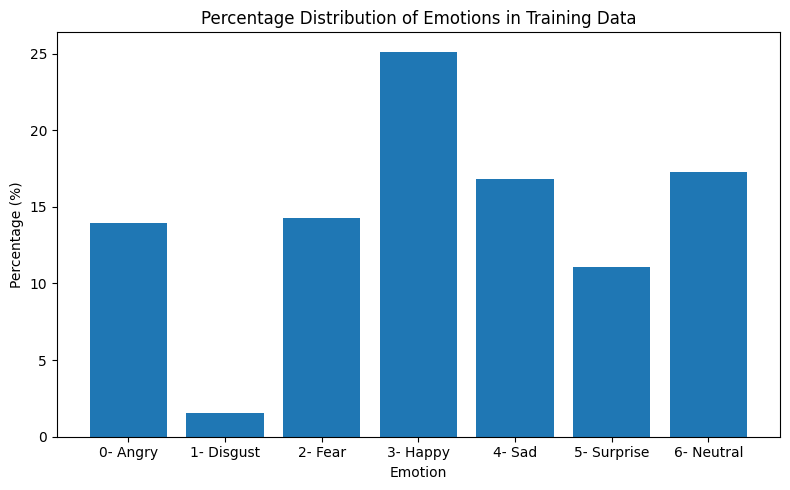

In [23]:
import matplotlib.pyplot as plt

emotion_counts = train_df['emotion'].value_counts()

emotion_percentages = (emotion_counts / emotion_counts.sum()) * 100

emotion_labels = {
    0: "Angry",
    1: "Disgust",
    2: "Fear",
    3: "Happy",
    4: "Sad",
    5: "Surprise",
    6: "Neutral"
}

combined_labels = [f"{num}- {name}" for num, name in emotion_labels.items()]

plt.figure(figsize=(8,5))
plt.bar(emotion_percentages.index, emotion_percentages.values)

plt.xticks(ticks=list(emotion_labels.keys()), labels=combined_labels)

plt.xlabel('Emotion')
plt.ylabel('Percentage (%)')
plt.title('Percentage Distribution of Emotions in Training Data')
plt.tight_layout()
plt.show()


# ვნახოთ target ცვლადის ანუ ემოციების განაწილება სავალიდაციო მონაცემებში.

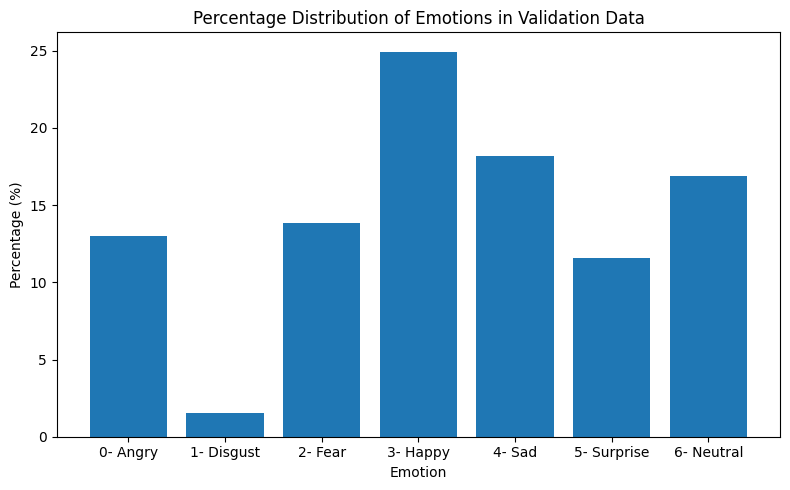

In [24]:
import matplotlib.pyplot as plt

emotion_counts = val_df['emotion'].value_counts()

emotion_percentages = (emotion_counts / emotion_counts.sum()) * 100

emotion_labels = {
    0: "Angry",
    1: "Disgust",
    2: "Fear",
    3: "Happy",
    4: "Sad",
    5: "Surprise",
    6: "Neutral"
}

combined_labels = [f"{num}- {name}" for num, name in emotion_labels.items()]

plt.figure(figsize=(8,5))
plt.bar(emotion_percentages.index, emotion_percentages.values)

plt.xticks(ticks=list(emotion_labels.keys()), labels=combined_labels)

plt.xlabel('Emotion')
plt.ylabel('Percentage (%)')
plt.title('Percentage Distribution of Emotions in Validation Data')
plt.tight_layout()
plt.show()


# ვნახოთ target ცვლადის ანუ ემოციების განაწილება სატესტო მონაცემებში.

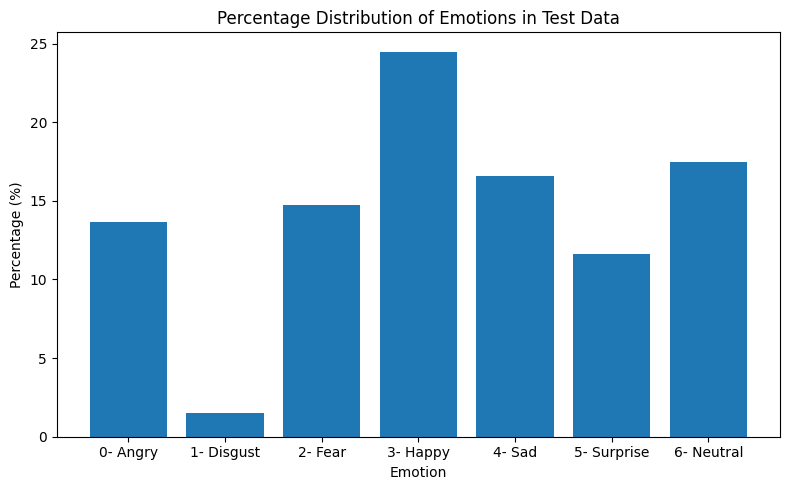

In [25]:
import matplotlib.pyplot as plt

emotion_counts = test_df['emotion'].value_counts()

emotion_percentages = (emotion_counts / emotion_counts.sum()) * 100

emotion_labels = {
    0: "Angry",
    1: "Disgust",
    2: "Fear",
    3: "Happy",
    4: "Sad",
    5: "Surprise",
    6: "Neutral"
}

combined_labels = [f"{num}- {name}" for num, name in emotion_labels.items()]

plt.figure(figsize=(8,5))
plt.bar(emotion_percentages.index, emotion_percentages.values)

plt.xticks(ticks=list(emotion_labels.keys()), labels=combined_labels)

plt.xlabel('Emotion')
plt.ylabel('Percentage (%)')
plt.title('Percentage Distribution of Emotions in Test Data')
plt.tight_layout()
plt.show()


ემოციების ერთნაირი განაწილებები გვაქვს სატრენინგო, სავალიდაციო და სატესტო დატაში, თუმცა თვითონ ემოციების კლასები არაა დაბალანსებული- Happy ყველაზე მეტია, ხოლო Disgust გვაქვს ძალიან ცოტა. (დანარჩენი ემოციები ასე თუ ისე თანაბრადაა)

# როგორც ჩანს ყველა ფოტოსთვის პიქსელების სიგრძე არის განსხვავებული.

In [26]:
len(train_df[' pixels'][0])

8287

In [27]:
pixel_counts = [len(train_df[' pixels'][i]) for i in range(len(train_df[' pixels']))]
pixel_counts[0:10]

[8287, 8687, 8581, 8555, 7721, 8640, 8550, 7912, 8793, 9076]

# Preprocessing:

In [28]:
import numpy as np

def string2array(x):
  return np.array(x.split(' ')).reshape(48, 48, 1).astype('float32') / 255.0

In [29]:
train_df['pixels'] = train_df[' pixels'].apply(lambda x: string2array(x))
val_df['pixels'] = val_df[' pixels'].apply(lambda x: string2array(x))
test_df['pixels'] = test_df[' pixels'].apply(lambda x: string2array(x))

In [30]:
train_df['pixels'].head()

,pixels
0,"[[[0.27450982], [0.3137255], [0.32156864], [0...."
1,"[[[0.5921569], [0.5882353], [0.5764706], [0.60..."
2,"[[[0.90588236], [0.83137256], [0.6117647], [0...."
3,"[[[0.09411765], [0.1254902], [0.14117648], [0...."
4,"[[[0.015686275], [0.0], [0.0], [0.0], [0.0], [..."


In [31]:
train_df['pixels'][0].dtype

dtype('float32')

In [32]:
X_train = np.stack(train_df['pixels'].values)
y_train = train_df['emotion'].values

X_val = np.stack(val_df['pixels'].values)
y_val = val_df['emotion'].values

X_test = np.stack(test_df['pixels'].values)
y_test = test_df['emotion'].values

In [33]:
X_train.shape, y_train.shape

((28709, 48, 48, 1), (28709,))

In [34]:
X_val.shape, y_val.shape

((3589, 48, 48, 1), (3589,))

In [34]:
X_test.shape, y_test.shape

((3589, 48, 48, 1), (3589,))

# First CNN architecture:

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F

class SimpleCNN(nn.Module):
    def __init__(self, num_classes=7):
        super(SimpleCNN, self).__init__()
        self.conv1 = nn.Conv2d(1, 16, kernel_size=3, padding=1)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(16, 32, kernel_size=3, padding=1)
        self.fc1 = nn.Linear(32 * 12 * 12, 128)
        self.fc2 = nn.Linear(128, num_classes)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))   # (48x48) → (24x24)
        x = self.pool(F.relu(self.conv2(x)))   # (24x24) → (12x12)
        x = x.reshape(-1, 32 * 12 * 12)
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        return x


შევამოწმოთ პატარა დატაზე, overfit-ში უნდა გადიოდეს.

In [ ]:
import torch.optim as optim


X_small = np.stack(X_train[:10])  # shape (10, 48, 48, 1)
y_small = np.array(y_train[:10])  # shape (10,)

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

X_small = torch.tensor(X_small).float().permute(0, 3, 1, 2).to(device)  # (10, 1, 48, 48)
y_small = torch.tensor(y_small).long().to(device)                       # (10,)


model = SimpleCNN().to(device)
optimizer = optim.Adam(model.parameters(), lr=0.01)
criterion = nn.CrossEntropyLoss()


for epoch in range(50):
    model.train()
    optimizer.zero_grad()
    outputs = model(X_small)
    loss = criterion(outputs, y_small)
    loss.backward()
    optimizer.step()

    _, preds = torch.max(outputs, 1)
    acc = (preds == y_small).float().mean()

    print(f"Epoch {epoch+1}, Loss: {loss.item():.4f}, Accuracy: {acc.item()*100:.2f}%")

    if acc.item() == 1.0:
        print("Model overfit successfully!")
        break


Epoch 1, Loss: 1.9286, Accuracy: 20.00%
Epoch 2, Loss: 2.0263, Accuracy: 30.00%
Epoch 3, Loss: 3.4189, Accuracy: 20.00%
Epoch 4, Loss: 1.7911, Accuracy: 20.00%
Epoch 5, Loss: 1.8376, Accuracy: 40.00%
Epoch 6, Loss: 1.7599, Accuracy: 40.00%
Epoch 7, Loss: 1.6397, Accuracy: 20.00%
Epoch 8, Loss: 1.4825, Accuracy: 50.00%
Epoch 9, Loss: 1.4320, Accuracy: 30.00%
Epoch 10, Loss: 1.2453, Accuracy: 70.00%
Epoch 11, Loss: 1.1167, Accuracy: 70.00%
Epoch 12, Loss: 0.8100, Accuracy: 100.00%
Model overfit successfully!


In [ ]:
from torch.utils.data import DataLoader, TensorDataset


wandb.init(project="emotion-recognition", name="simple_cnn")

X_train_tensor = torch.tensor(X_train, dtype=torch.float32).permute(0, 3, 1, 2)
y_train_tensor = torch.tensor(y_train, dtype=torch.long)
X_val_tensor = torch.tensor(X_val, dtype=torch.float32).permute(0, 3, 1, 2)
y_val_tensor = torch.tensor(y_val, dtype=torch.long)

train_loader = DataLoader(TensorDataset(X_train_tensor, y_train_tensor), batch_size=64, shuffle=True)
val_loader = DataLoader(TensorDataset(X_val_tensor, y_val_tensor), batch_size=64)

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

model = SimpleCNN().to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)


for epoch in range(10):
    model.train()
    running_loss, correct = 0.0, 0
    for inputs, labels in train_loader:
        inputs, labels = inputs.to(device), labels.to(device)
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
        correct += (outputs.argmax(1) == labels).sum().item()

    train_acc = correct / len(train_loader.dataset)

    # Validation
    model.eval()
    val_correct = 0
    with torch.no_grad():
        for inputs, labels in val_loader:
            inputs, labels = inputs.to(device), labels.to(device)
            outputs = model(inputs)
            val_correct += (outputs.argmax(1) == labels).sum().item()

    val_acc = val_correct / len(val_loader.dataset)

    # Log to wandb
    wandb.log({
        "epoch": epoch + 1,
        "loss": running_loss / len(train_loader),
        "train_acc": train_acc,
        "val_acc": val_acc
    })

    print(f"Epoch {epoch+1}: Train Acc = {train_acc:.4f}, Val Acc = {val_acc:.4f}")


Epoch 1: Train Acc = 0.3338, Val Acc = 0.4018
Epoch 2: Train Acc = 0.4216, Val Acc = 0.4408
Epoch 3: Train Acc = 0.4635, Val Acc = 0.4648
Epoch 4: Train Acc = 0.4971, Val Acc = 0.4806
Epoch 5: Train Acc = 0.5285, Val Acc = 0.4987
Epoch 6: Train Acc = 0.5582, Val Acc = 0.4890
Epoch 7: Train Acc = 0.5871, Val Acc = 0.5160
Epoch 8: Train Acc = 0.6168, Val Acc = 0.5157
Epoch 9: Train Acc = 0.6479, Val Acc = 0.5255
Epoch 10: Train Acc = 0.6748, Val Acc = 0.5219


In [ ]:
model.eval()
correct, total = 0, 0

with torch.no_grad():
    for images, labels in val_loader:
        images, labels = images.to(device), labels.to(device)
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print(f"Validation Accuracy: {100 * correct / total:.2f}%")

Validation Accuracy: 52.19%


# More general class of CNN:

In [61]:
import torch
import torch.nn as nn
import torch.nn.functional as F

class GeneralCNN(nn.Module):
    def __init__(
        self,
        input_channels=1,
        num_classes=7,
        conv_layers_config=[(32, 3), (64, 3), (128, 3)],  # (out_channels, kernel_size)
        dropout_conv=0.25,
        dropout_fc=0.5,
        norm_type='batch',  # 'batch', 'layer', 'none'
        pool_type='max',    # 'max', 'avg', 'none'
        image_size=48       # square images like 48x48
    ):
        super(GeneralCNN, self).__init__()

        self.convs = nn.ModuleList()
        self.norms = nn.ModuleList()
        self.pools = nn.ModuleList()
        self.dropouts = nn.ModuleList()

        in_channels = input_channels
        curr_size = image_size

        for out_channels, kernel_size in conv_layers_config:
            padding = kernel_size // 2
            self.convs.append(nn.Conv2d(in_channels, out_channels, kernel_size, padding=padding))

            if norm_type == 'batch':
                self.norms.append(nn.BatchNorm2d(out_channels))
            elif norm_type == 'layer':
                self.norms.append(nn.GroupNorm(1, out_channels))
            else:
                self.norms.append(nn.Identity())

            if pool_type == 'max':
                self.pools.append(nn.MaxPool2d(2))
                curr_size //= 2
            elif pool_type == 'avg':
                self.pools.append(nn.AvgPool2d(2))
                curr_size //= 2
            else:
                self.pools.append(nn.Identity())

            self.dropouts.append(nn.Dropout(dropout_conv))
            in_channels = out_channels

        self.flattened_size = in_channels * curr_size * curr_size
        self.fc1 = nn.Linear(self.flattened_size, 128)
        self.dropout_fc = nn.Dropout(dropout_fc)
        self.fc2 = nn.Linear(128, num_classes)

    def forward(self, x):
        for conv, norm, pool, drop in zip(self.convs, self.norms, self.pools, self.dropouts):
            x = conv(x)
            x = norm(x)
            x = F.relu(x)
            x = pool(x)
            x = drop(x)

        x = x.reshape(x.size(0), -1)
        x = F.relu(self.fc1(x))
        x = self.dropout_fc(x)
        x = self.fc2(x)
        return x


შევამოწმოთ პატარა დატაზე

In [ ]:
import torch.optim as optim


X_small = np.stack(X_train[:10])  # shape (10, 48, 48, 1)
y_small = np.array(y_train[:10])  # shape (10,)

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

X_small = torch.tensor(X_small).float().permute(0, 3, 1, 2).to(device)  # (10, 1, 48, 48)
y_small = torch.tensor(y_small).long().to(device)                       # (10,)


model = GeneralCNN().to(device)
optimizer = optim.Adam(model.parameters(), lr=0.01)
criterion = nn.CrossEntropyLoss()


for epoch in range(50):
    model.train()
    optimizer.zero_grad()
    outputs = model(X_small)
    loss = criterion(outputs, y_small)
    loss.backward()
    optimizer.step()

    _, preds = torch.max(outputs, 1)
    acc = (preds == y_small).float().mean()

    print(f"Epoch {epoch+1}, Loss: {loss.item():.4f}, Accuracy: {acc.item()*100:.2f}%")

    if acc.item() == 1.0:
        print("Model overfit successfully!")
        break


Epoch 1, Loss: 1.9740, Accuracy: 10.00%
Epoch 2, Loss: 11.9810, Accuracy: 40.00%
Epoch 3, Loss: 22.2459, Accuracy: 40.00%
Epoch 4, Loss: 23.2100, Accuracy: 40.00%
Epoch 5, Loss: 11.2765, Accuracy: 60.00%
Epoch 6, Loss: 15.4214, Accuracy: 20.00%
Epoch 7, Loss: 4.9106, Accuracy: 70.00%
Epoch 8, Loss: 9.0277, Accuracy: 40.00%
Epoch 9, Loss: 5.0615, Accuracy: 60.00%
Epoch 10, Loss: 1.5036, Accuracy: 70.00%
Epoch 11, Loss: 3.1671, Accuracy: 60.00%
Epoch 12, Loss: 3.0787, Accuracy: 60.00%
Epoch 13, Loss: 2.3260, Accuracy: 70.00%
Epoch 14, Loss: 1.5665, Accuracy: 90.00%
Epoch 15, Loss: 2.0860, Accuracy: 70.00%
Epoch 16, Loss: 0.2288, Accuracy: 80.00%
Epoch 17, Loss: 2.6278, Accuracy: 80.00%
Epoch 18, Loss: 1.3697, Accuracy: 80.00%
Epoch 19, Loss: 1.0606, Accuracy: 80.00%
Epoch 20, Loss: 1.4243, Accuracy: 80.00%
Epoch 21, Loss: 0.0684, Accuracy: 100.00%
Model overfit successfully!


# Hyperparameter Tuning for CNN:

In [66]:
from torch.utils.data import DataLoader, TensorDataset

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Convert to tensors
X_train_tensor = torch.tensor(X_train).float().permute(0, 3, 1, 2)  # (N, 1, 48, 48)
y_train_tensor = torch.tensor(y_train).long()

X_val_tensor = torch.tensor(X_val).float().permute(0, 3, 1, 2)
y_val_tensor = torch.tensor(y_val).long()

# Datasets
train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
val_dataset = TensorDataset(X_val_tensor, y_val_tensor)

In [64]:
def train_one_epoch(model, loader, criterion, optimizer):
    model.train()
    total_loss, correct = 0.0, 0

    for X_batch, y_batch in loader:
        X_batch, y_batch = X_batch.to(device), y_batch.to(device)
        optimizer.zero_grad()
        out = model(X_batch)
        loss = criterion(out, y_batch)
        loss.backward()
        optimizer.step()

        total_loss += loss.item() * X_batch.size(0)
        preds = torch.argmax(out, dim=1)
        correct += (preds == y_batch).sum().item()

    avg_loss = total_loss / len(loader.dataset)
    acc = correct / len(loader.dataset)
    return avg_loss, acc


def evaluate(model, loader, criterion):
    model.eval()
    total_loss, correct = 0.0, 0

    with torch.no_grad():
        for X_batch, y_batch in loader:
            X_batch, y_batch = X_batch.to(device), y_batch.to(device)
            out = model(X_batch)
            loss = criterion(out, y_batch)
            total_loss += loss.item() * X_batch.size(0)
            preds = torch.argmax(out, dim=1)
            correct += (preds == y_batch).sum().item()

    avg_loss = total_loss / len(loader.dataset)
    acc = correct / len(loader.dataset)
    return avg_loss, acc


In [68]:
from tqdm import tqdm
from sklearn.utils.class_weight import compute_class_weight

best_val_acc = 0.0
best_model_state = None
best_config = None

all_possible_classes = np.arange(7)

# Get class weights
labels = [label.item() for _, label in train_dataset]
class_weights = compute_class_weight('balanced', classes=all_possible_classes, y=labels)
class_weights = torch.tensor(class_weights, dtype=torch.float).to(device)


def train_with_config(config, run_name):
    wandb.init(project="emotion-recognition", name=run_name, config=config)

    model = GeneralCNN(
        input_channels=1,
        num_classes=7,
        conv_layers_config=config["conv_layers_config"],
        dropout_conv=config["dropout_conv"],
        dropout_fc=config["dropout_fc"],
        norm_type=config["norm_type"],
        pool_type=config["pool_type"],
        image_size=48
    ).to(device)

    optimizer = torch.optim.Adam(model.parameters(), lr=config["lr"])
    #criterion = torch.nn.CrossEntropyLoss()
    criterion = nn.CrossEntropyLoss(weight=class_weights)

    train_loader = DataLoader(train_dataset, batch_size=config["batch_size"], shuffle=True)
    val_loader = DataLoader(val_dataset, batch_size=config["batch_size"], shuffle=False)

    best_acc = 0
    patience = 5
    patience_counter = 0
    best_model = None

    for epoch in range(config["epochs"]):
        train_loss, train_acc = train_one_epoch(model, train_loader, criterion, optimizer)
        val_loss, val_acc = evaluate(model, val_loader, criterion)

        wandb.log({
            "epoch": epoch + 1,
            "train_loss": train_loss,
            "train_acc": train_acc,
            "val_loss": val_loss,
            "val_acc": val_acc
        })

        if val_acc > best_acc:
            best_acc = val_acc
            best_model = model.state_dict()
            patience_counter = 0
        else:
            patience_counter += 1
            if patience_counter >= patience:
                break

    wandb.finish()
    return best_acc, best_model


In [69]:
conv_options = [[(16, 3), (32, 3), (64, 3)], [(32, 3), (64, 3), (128, 3)]]
dropout_conv_options = [0.1, 0.2, 0.3]
dropout_fc_options = [0.2, 0.3, 0.4]
norm_options = ["batch", "layer", "none"]
pool_options = ["max", "avg", "none"]
lr_options = [0.001, 0.01, 0.05]
batch_sizes = [64, 128]
epochs = 20

num_trials = 30

Random Search

In [70]:
import itertools
import random

all_combinations = list(itertools.product(
    conv_options,
    dropout_conv_options,
    dropout_fc_options,
    norm_options,
    pool_options,
    lr_options,
    batch_sizes
))

sampled_combinations = random.sample(all_combinations, num_trials)

In [71]:
for i, combo in enumerate(tqdm(sampled_combinations, desc="Hyperparameter Trials")):
    config = {
        "conv_layers_config": combo[0],
        "dropout_conv": combo[1],
        "dropout_fc": combo[2],
        "norm_type": combo[3],
        "pool_type": combo[4],
        "lr": combo[5],
        "batch_size": combo[6],
        "epochs": epochs
    }

    run_name = f"weighted_CNN_hparam_tuning_{i+1}"
    print(f"\n Running config {i+1}/{num_trials}: {config}")

    val_acc, model_state = train_with_config(config, run_name)

    if val_acc > best_val_acc:
        best_val_acc = val_acc
        best_model_state = model_state
        best_config = config


print("\n Best validation accuracy:", best_val_acc)
print("Best hyperparameters:", best_config)

Hyperparameter Trials:   0%|          | 0/30 [00:00<?, ?it/s]


 Running config 1/30: {'conv_layers_config': [(32, 3), (64, 3), (128, 3)], 'dropout_conv': 0.3, 'dropout_fc': 0.3, 'norm_type': 'layer', 'pool_type': 'max', 'lr': 0.01, 'batch_size': 128, 'epochs': 20}


epoch,▁▂▃▅▆▇█
train_acc,▅▁█▁▂▃▂
train_loss,█▁▁▁▁▁▁
val_acc,▂█▄▁▄▄▄
val_loss,▆▅▅▁█▄▂
epoch,7
train_acc,0.1589
train_loss,1.94657
val_acc,0.18194
val_loss,1.94574


Hyperparameter Trials:   3%|▎         | 1/30 [00:25<12:26, 25.74s/it]


 Running config 2/30: {'conv_layers_config': [(16, 3), (32, 3), (64, 3)], 'dropout_conv': 0.2, 'dropout_fc': 0.2, 'norm_type': 'batch', 'pool_type': 'none', 'lr': 0.01, 'batch_size': 64, 'epochs': 20}


epoch,▁▂▄▅▇█
train_acc,█▁▄██▅
train_loss,█▁▁▁▁▁
val_acc,█▇▁▃▇▃
val_loss,▂▁▂█▃█
epoch,6
train_acc,0.16371
train_loss,1.94584
val_acc,0.1382
val_loss,1.94766


Hyperparameter Trials:   7%|▋         | 2/30 [01:29<22:32, 48.30s/it]


 Running config 3/30: {'conv_layers_config': [(16, 3), (32, 3), (64, 3)], 'dropout_conv': 0.3, 'dropout_fc': 0.2, 'norm_type': 'layer', 'pool_type': 'none', 'lr': 0.05, 'batch_size': 64, 'epochs': 20}


epoch,▁▂▂▃▃▄▄▅▅▆▆▇▇█
train_acc,▃▁▆▄█▇▃▄▆▆▄▅█▅
train_loss,█▁▁▁▁▁▁▁▁▁▁▁▁▁
val_acc,▁▄▁▅▄▁▄▄█▆▄▆▄▅
val_loss,▄▅▂▆▄▅█▄▂▁▄█▃▇
epoch,14
train_acc,0.14483
train_loss,1.94993
val_acc,0.1382
val_loss,1.95313


Hyperparameter Trials:  10%|█         | 3/30 [03:52<41:07, 91.38s/it]


 Running config 4/30: {'conv_layers_config': [(16, 3), (32, 3), (64, 3)], 'dropout_conv': 0.2, 'dropout_fc': 0.3, 'norm_type': 'layer', 'pool_type': 'max', 'lr': 0.05, 'batch_size': 128, 'epochs': 20}


epoch,▁▂▃▄▅▅▆▇█
train_acc,▁▅▇▅▆▅▃█▆
train_loss,█▁▁▁▁▁▁▁▁
val_acc,▁▆▁█▁▇▇▆█
val_loss,▂▁█▁█▂▅▁▂
epoch,9
train_acc,0.13863
train_loss,1.94919
val_acc,0.16913
val_loss,1.94753


Hyperparameter Trials:  13%|█▎        | 4/30 [04:12<27:24, 63.26s/it]


 Running config 5/30: {'conv_layers_config': [(16, 3), (32, 3), (64, 3)], 'dropout_conv': 0.3, 'dropout_fc': 0.2, 'norm_type': 'none', 'pool_type': 'none', 'lr': 0.05, 'batch_size': 128, 'epochs': 20}


epoch,▁▂▃▄▅▅▆▇█
train_acc,█▁▇█▇▅███
train_loss,█▁▁▁▁▁▁▁▁
val_acc,▆▁▆█▄▆▄▆▄
val_loss,▃▆▁█▂▆▁▄▃
epoch,9
train_acc,0.14257
train_loss,1.94985
val_acc,0.11563
val_loss,1.94712


Hyperparameter Trials:  17%|█▋        | 5/30 [05:22<27:19, 65.59s/it]


 Running config 6/30: {'conv_layers_config': [(32, 3), (64, 3), (128, 3)], 'dropout_conv': 0.2, 'dropout_fc': 0.3, 'norm_type': 'layer', 'pool_type': 'max', 'lr': 0.001, 'batch_size': 128, 'epochs': 20}


epoch,▁▂▃▃▄▅▆▆▇█
train_acc,▁▁▅▇▇█▆▇█▆
train_loss,█▁▁▁▁▁▁▁▁▁
val_acc,▁▆▆▆██▆▆▆▅
val_loss,▇▁▃▄▇▅▅▆▆█
epoch,10
train_acc,0.16308
train_loss,1.94586
val_acc,0.1382
val_loss,1.94597


Hyperparameter Trials:  20%|██        | 6/30 [05:58<22:12, 55.50s/it]


 Running config 7/30: {'conv_layers_config': [(16, 3), (32, 3), (64, 3)], 'dropout_conv': 0.1, 'dropout_fc': 0.2, 'norm_type': 'batch', 'pool_type': 'max', 'lr': 0.001, 'batch_size': 64, 'epochs': 20}


epoch,▁▁▂▂▂▃▃▄▄▄▅▅▅▆▆▇▇▇██
train_acc,▁▄▅▅▆▆▆▆▇▇▇▇▇▇▇▇████
train_loss,█▆▅▅▄▄▄▃▃▃▂▂▂▂▂▂▁▁▁▁
val_acc,▁▁▃▃▅▃▅▆▅▆▆▇▆▇▇█▆███
val_loss,█▆▅▄▄▄▃▂▃▂▁▂▂▂▁▁▁▂▁▂
epoch,20
train_acc,0.49417
train_loss,1.21806
val_acc,0.51797
val_loss,1.34912


Hyperparameter Trials:  23%|██▎       | 7/30 [06:49<20:45, 54.15s/it]


 Running config 8/30: {'conv_layers_config': [(32, 3), (64, 3), (128, 3)], 'dropout_conv': 0.3, 'dropout_fc': 0.2, 'norm_type': 'layer', 'pool_type': 'max', 'lr': 0.001, 'batch_size': 128, 'epochs': 20}


epoch,▁▂▃▃▄▅▆▆▇█
train_acc,▁▂▂▄▆█▃█▅▅
train_loss,█▁▁▁▁▁▁▁▁▁
val_acc,▁▁▁▁█▄▃█▁█
val_loss,█▄▂▂▁▁▂▂▁▂
epoch,10
train_acc,0.17322
train_loss,1.94581
val_acc,0.24937
val_loss,1.94597


Hyperparameter Trials:  27%|██▋       | 8/30 [07:25<17:40, 48.23s/it]


 Running config 9/30: {'conv_layers_config': [(32, 3), (64, 3), (128, 3)], 'dropout_conv': 0.3, 'dropout_fc': 0.2, 'norm_type': 'layer', 'pool_type': 'avg', 'lr': 0.001, 'batch_size': 128, 'epochs': 20}


epoch,▁▁▂▂▂▃▃▄▄▄▅▅▅▆▆▇▇▇██
train_acc,▁▄▅▄▅▅▅▆▆▆▇▇▇▇▇▇████
train_loss,█▇▆▆▅▅▅▄▄▄▃▃▃▂▂▂▂▂▁▁
val_acc,▁▂▃▃▃▂▄▅▄▅▅▆▅▆▆▇▆▇▇█
val_loss,█▇▆▆▅▅▄▅▄▄▃▂▃▂▂▁▁▁▁▁
epoch,20
train_acc,0.38643
train_loss,1.49955
val_acc,0.46447
val_loss,1.43441


Hyperparameter Trials:  30%|███       | 9/30 [08:32<19:01, 54.34s/it]


 Running config 10/30: {'conv_layers_config': [(16, 3), (32, 3), (64, 3)], 'dropout_conv': 0.1, 'dropout_fc': 0.4, 'norm_type': 'none', 'pool_type': 'avg', 'lr': 0.01, 'batch_size': 128, 'epochs': 20}


epoch,▁▂▃▃▄▅▆▆▇█
train_acc,▃▅▄▁▇▄▆██▄
train_loss,█▁▂▁▁▁▁▁▁▁
val_acc,▄▁▂▄█▂▄▄▄▂
val_loss,▃▁▃▄▄▇▅▂▁█
epoch,10
train_acc,0.14647
train_loss,1.94631
val_acc,0.13012
val_loss,1.9474


Hyperparameter Trials:  33%|███▎      | 10/30 [08:51<14:26, 43.32s/it]


 Running config 11/30: {'conv_layers_config': [(16, 3), (32, 3), (64, 3)], 'dropout_conv': 0.3, 'dropout_fc': 0.3, 'norm_type': 'layer', 'pool_type': 'avg', 'lr': 0.05, 'batch_size': 64, 'epochs': 20}


epoch,▁▂▂▃▄▄▅▅▆▇▇█
train_acc,▃▅▆▆█▆▄▅▁▄▃▄
train_loss,█▁▁▁▁▁▁▁▁▁▁▁
val_acc,▄▄▂▂▂▄█▄▂▁▁▄
val_loss,▅▁█▆▃▆▂▂▅▁▂▃
epoch,12
train_acc,0.14584
train_loss,1.94959
val_acc,0.18194
val_loss,1.94746


Hyperparameter Trials:  37%|███▋      | 11/30 [09:22<12:33, 39.63s/it]


 Running config 12/30: {'conv_layers_config': [(16, 3), (32, 3), (64, 3)], 'dropout_conv': 0.1, 'dropout_fc': 0.3, 'norm_type': 'none', 'pool_type': 'none', 'lr': 0.05, 'batch_size': 64, 'epochs': 20}


epoch,▁▂▃▅▆▇█
train_acc,▅▇▆█▅▁▃
train_loss,█▁▁▁▁▁▁
val_acc,▁█▁▆▂▁▂
val_loss,▃▇█▂▁▅▄
epoch,7
train_acc,0.14361
train_loss,1.95018
val_acc,0.1382
val_loss,1.94973


Hyperparameter Trials:  40%|████      | 12/30 [10:27<14:12, 47.38s/it]


 Running config 13/30: {'conv_layers_config': [(32, 3), (64, 3), (128, 3)], 'dropout_conv': 0.3, 'dropout_fc': 0.3, 'norm_type': 'batch', 'pool_type': 'none', 'lr': 0.01, 'batch_size': 128, 'epochs': 20}


epoch,▁▂▄▅▇█
train_acc,▃▁█▄▆▃
train_loss,█▁▁▁▁▁
val_acc,█▄▁▄▄▂
val_loss,▃▃▃▁▆█
epoch,6
train_acc,0.14044
train_loss,1.94664
val_acc,0.1382
val_loss,1.94703


Hyperparameter Trials:  43%|████▎     | 13/30 [12:15<18:37, 65.72s/it]


 Running config 14/30: {'conv_layers_config': [(32, 3), (64, 3), (128, 3)], 'dropout_conv': 0.3, 'dropout_fc': 0.3, 'norm_type': 'batch', 'pool_type': 'max', 'lr': 0.01, 'batch_size': 128, 'epochs': 20}


epoch,▁▁▂▂▃▃▄▄▅▅▅▆▆▇▇██
train_acc,▃▅▅▅▆▆▄█▅▄▃▄▂▂▁▃▃
train_loss,█▃▃▃▂▂▂▂▁▁▁▁▁▁▁▁▁
val_acc,▅▄▅▂▆▆▇▇▃▆▁█▄▃▄▂▃
val_loss,█▆▇▄▅▃▂▄▂▂▆▂▁▂▁▂▂
epoch,17
train_acc,0.17517
train_loss,1.77661
val_acc,0.14071
val_loss,1.74824


Hyperparameter Trials:  47%|████▋     | 14/30 [13:13<16:54, 63.39s/it]


 Running config 15/30: {'conv_layers_config': [(32, 3), (64, 3), (128, 3)], 'dropout_conv': 0.3, 'dropout_fc': 0.4, 'norm_type': 'batch', 'pool_type': 'none', 'lr': 0.01, 'batch_size': 64, 'epochs': 20}


epoch,▁▂▂▃▄▅▅▆▇▇█
train_acc,▆▂▃█▄█▆▁▂▆▄
train_loss,█▁▁▁▁▁▁▁▁▁▁
val_acc,▁▄▁▂▂█▁▂▄▄▂
val_loss,█▆▁▇▄▂▂▁▄▁█
epoch,11
train_acc,0.16225
train_loss,1.94593
val_acc,0.13012
val_loss,1.94769


Hyperparameter Trials:  50%|█████     | 15/30 [16:59<28:04, 112.28s/it]


 Running config 16/30: {'conv_layers_config': [(32, 3), (64, 3), (128, 3)], 'dropout_conv': 0.1, 'dropout_fc': 0.3, 'norm_type': 'none', 'pool_type': 'max', 'lr': 0.05, 'batch_size': 128, 'epochs': 20}


epoch,▁▂▂▃▄▅▅▆▇▇█
train_acc,█▅▅▇▄▄█▁▆▆▇
train_loss,█▁▁▁▁▁▁▁▁▁▁
val_acc,▁▆▇▇▆█▁▅▆▇▆
val_loss,▃▃▂▂▂▁▆▅█▁▂
epoch,11
train_acc,0.15068
train_loss,1.94852
val_acc,0.1382
val_loss,1.94825


Hyperparameter Trials:  53%|█████▎    | 16/30 [17:31<20:33, 88.14s/it] 


 Running config 17/30: {'conv_layers_config': [(32, 3), (64, 3), (128, 3)], 'dropout_conv': 0.3, 'dropout_fc': 0.4, 'norm_type': 'layer', 'pool_type': 'none', 'lr': 0.05, 'batch_size': 128, 'epochs': 20}


epoch,▁▂▃▅▆▇█
train_acc,▆▁█▇▇▄▆
train_loss,█▁▁▁▁▁▁
val_acc,▁██▁▁▄▁
val_loss,▁▂▅█▃▃▃
epoch,7
train_acc,0.13853
train_loss,1.94896
val_acc,0.1382
val_loss,1.9489


Hyperparameter Trials:  57%|█████▋    | 17/30 [19:34<21:23, 98.74s/it]


 Running config 18/30: {'conv_layers_config': [(16, 3), (32, 3), (64, 3)], 'dropout_conv': 0.1, 'dropout_fc': 0.4, 'norm_type': 'batch', 'pool_type': 'none', 'lr': 0.05, 'batch_size': 128, 'epochs': 20}


epoch,▁▂▃▄▅▆▇█
train_acc,▅▁▇▁▄▅█▄
train_loss,█▁▁▁▁▁▁▁
val_acc,▂▂█▁▄▁▄▂
val_loss,▁█▁▁▁▁▁▁
epoch,8
train_acc,0.14497
train_loss,1.94913
val_acc,0.13012
val_loss,1.95921


Hyperparameter Trials:  60%|██████    | 18/30 [20:46<18:08, 90.68s/it]


 Running config 19/30: {'conv_layers_config': [(16, 3), (32, 3), (64, 3)], 'dropout_conv': 0.3, 'dropout_fc': 0.2, 'norm_type': 'layer', 'pool_type': 'none', 'lr': 0.001, 'batch_size': 64, 'epochs': 20}


epoch,▁▂▃▄▅▆▇█
train_acc,▁▅▅▆▇▇▆█
train_loss,█▁▁▁▁▁▁▁
val_acc,▁▄███▃██
val_loss,█▁▄▄▅▆▆▆
epoch,8
train_acc,0.23317
train_loss,1.94503
val_acc,0.24937
val_loss,1.94602


Hyperparameter Trials:  63%|██████▎   | 19/30 [22:10<16:13, 88.48s/it]


 Running config 20/30: {'conv_layers_config': [(16, 3), (32, 3), (64, 3)], 'dropout_conv': 0.2, 'dropout_fc': 0.3, 'norm_type': 'batch', 'pool_type': 'none', 'lr': 0.05, 'batch_size': 64, 'epochs': 20}


epoch,▁▂▂▃▄▅▅▆▇▇█
train_acc,▂█▃▆▆▁▇▆▇▃▆
train_loss,█▁▁▁▁▁▁▁▁▁▁
val_acc,▄▄▁▆▆█▄▄▁▄█
val_loss,▃█▂▁▂▂▂▂▂▁▂
epoch,11
train_acc,0.15365
train_loss,1.95017
val_acc,0.24937
val_loss,1.94969


Hyperparameter Trials:  67%|██████▋   | 20/30 [24:03<15:58, 95.88s/it]


 Running config 21/30: {'conv_layers_config': [(32, 3), (64, 3), (128, 3)], 'dropout_conv': 0.2, 'dropout_fc': 0.3, 'norm_type': 'none', 'pool_type': 'none', 'lr': 0.01, 'batch_size': 128, 'epochs': 20}


epoch,▁▂▄▅▇█
train_acc,▅█▄▄▅▁
train_loss,█▁▁▁▁▁
val_acc,█▃▁█▁▇
val_loss,▄▄▄▃▁█
epoch,6
train_acc,0.13801
train_loss,1.94635
val_acc,0.16913
val_loss,1.94676


Hyperparameter Trials:  70%|███████   | 21/30 [25:37<14:18, 95.34s/it]


 Running config 22/30: {'conv_layers_config': [(32, 3), (64, 3), (128, 3)], 'dropout_conv': 0.3, 'dropout_fc': 0.3, 'norm_type': 'layer', 'pool_type': 'max', 'lr': 0.001, 'batch_size': 64, 'epochs': 20}


epoch,▁▂▃▅▆▇█
train_acc,▁▁▆▆▅█▇
train_loss,█▁▁▁▁▁▁
val_acc,▂█████▁
val_loss,▄▁▃▅█▆▂
epoch,7
train_acc,0.20628
train_loss,1.94519
val_acc,0.11563
val_loss,1.94579


Hyperparameter Trials:  73%|███████▎  | 22/30 [26:05<10:00, 75.10s/it]


 Running config 23/30: {'conv_layers_config': [(16, 3), (32, 3), (64, 3)], 'dropout_conv': 0.3, 'dropout_fc': 0.2, 'norm_type': 'batch', 'pool_type': 'avg', 'lr': 0.05, 'batch_size': 128, 'epochs': 20}


epoch,▁▁▂▂▃▃▃▄▄▅▅▅▆▆▆▇▇██
train_acc,▁▁▃▅▆▆▆▇▆█▇▇█▇▇▇▆▆▇
train_loss,█▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
val_acc,▁▃▅▅▅▅▅▆▇▆▆▆▅█▆▆▇▅▂
val_loss,█▅▄▄▄▃▃▃▃▃▂▃▂▁▂▃▁▃▃
epoch,19
train_acc,0.20307
train_loss,1.90465
val_acc,0.10644
val_loss,1.86688


Hyperparameter Trials:  77%|███████▋  | 23/30 [26:44<07:29, 64.19s/it]


 Running config 24/30: {'conv_layers_config': [(16, 3), (32, 3), (64, 3)], 'dropout_conv': 0.3, 'dropout_fc': 0.4, 'norm_type': 'layer', 'pool_type': 'max', 'lr': 0.05, 'batch_size': 128, 'epochs': 20}


epoch,▁▂▄▅▇█
train_acc,▇▆█▃▁▇
train_loss,█▁▁▁▁▁
val_acc,█▁▃█▃▁
val_loss,▄▁▄▇█▇
epoch,6
train_acc,0.15284
train_loss,1.94859
val_acc,0.13012
val_loss,1.94945


Hyperparameter Trials:  80%|████████  | 24/30 [26:58<04:55, 49.29s/it]


 Running config 25/30: {'conv_layers_config': [(16, 3), (32, 3), (64, 3)], 'dropout_conv': 0.2, 'dropout_fc': 0.2, 'norm_type': 'layer', 'pool_type': 'max', 'lr': 0.01, 'batch_size': 128, 'epochs': 20}


epoch,▁▂▃▄▅▆▇█
train_acc,▁▇▂█▆▆▅▆
train_loss,█▁▁▁▁▁▁▁
val_acc,▃▃█▃▇▁▃▇
val_loss,▄▆▁▇▆██▆
epoch,8
train_acc,0.15598
train_loss,1.94635
val_acc,0.16913
val_loss,1.94649


Hyperparameter Trials:  83%|████████▎ | 25/30 [27:16<03:19, 39.91s/it]


 Running config 26/30: {'conv_layers_config': [(32, 3), (64, 3), (128, 3)], 'dropout_conv': 0.1, 'dropout_fc': 0.3, 'norm_type': 'batch', 'pool_type': 'max', 'lr': 0.001, 'batch_size': 128, 'epochs': 20}


epoch,▁▁▂▂▂▃▃▄▄▄▅▅▅▆▆▇▇▇██
train_acc,▁▄▄▅▅▆▆▆▇▇▇▇▇▇██████
train_loss,█▆▆▅▄▄▄▃▃▃▂▂▂▂▂▂▂▁▁▁
val_acc,▂▁▃▃▃▃▆▅▆▇▆▆▇▇▆▇▇█▇█
val_loss,▇█▆▅▅▅▃▃▃▂▂▂▂▁▁▁▁▂▃▁
epoch,20
train_acc,0.37605
train_loss,1.46054
val_acc,0.48621
val_loss,1.44762


Hyperparameter Trials:  87%|████████▋ | 26/30 [28:24<03:13, 48.33s/it]


 Running config 27/30: {'conv_layers_config': [(16, 3), (32, 3), (64, 3)], 'dropout_conv': 0.1, 'dropout_fc': 0.4, 'norm_type': 'none', 'pool_type': 'none', 'lr': 0.001, 'batch_size': 128, 'epochs': 20}


epoch,▁▁▂▂▃▃▄▄▅▅▅▆▆▇▇██
train_acc,▁▂▃▃▄▄▄▅▅▆▆▆▇▇▇██
train_loss,█▇▆▆▅▅▄▄▄▃▃▃▂▂▂▁▁
val_acc,▁▁▆▇▆▆▇▆▇████████
val_loss,▄▃▂▂▁▁▁▁▁▃▃▄▃▆▆▅█
epoch,17
train_acc,0.70939
train_loss,0.63759
val_acc,0.4681
val_loss,2.26657


Hyperparameter Trials:  90%|█████████ | 27/30 [30:35<03:39, 73.09s/it]


 Running config 28/30: {'conv_layers_config': [(16, 3), (32, 3), (64, 3)], 'dropout_conv': 0.1, 'dropout_fc': 0.3, 'norm_type': 'batch', 'pool_type': 'avg', 'lr': 0.05, 'batch_size': 128, 'epochs': 20}


epoch,▁▂▂▃▃▄▅▅▆▆▇▇█
train_acc,▃▆▃▄▃▃▁▄▅▂█▆▃
train_loss,█▁▁▁▁▁▁▁▁▁▁▁▁
val_acc,▂▃▄█▃▁▄█▂▁▄██
val_loss,▂▅▁▆█▅▄▂▄▄▁▂▃
epoch,13
train_acc,0.13647
train_loss,1.94999
val_acc,0.24937
val_loss,1.94923


Hyperparameter Trials:  93%|█████████▎| 28/30 [31:03<01:59, 59.52s/it]


 Running config 29/30: {'conv_layers_config': [(16, 3), (32, 3), (64, 3)], 'dropout_conv': 0.2, 'dropout_fc': 0.4, 'norm_type': 'none', 'pool_type': 'avg', 'lr': 0.05, 'batch_size': 128, 'epochs': 20}


epoch,▁▂▃▅▆▇█
train_acc,▆▁▂█▇▆▅
train_loss,█▁▁▁▁▁▁
val_acc,▁█▅▄▁▆▄
val_loss,█▂▁▄▃▂▄
epoch,7
train_acc,0.13417
train_loss,1.94863
val_acc,0.13012
val_loss,1.95042


Hyperparameter Trials:  97%|█████████▋| 29/30 [31:18<00:46, 46.20s/it]


 Running config 30/30: {'conv_layers_config': [(32, 3), (64, 3), (128, 3)], 'dropout_conv': 0.3, 'dropout_fc': 0.2, 'norm_type': 'layer', 'pool_type': 'avg', 'lr': 0.05, 'batch_size': 64, 'epochs': 20}


epoch,▁▂▃▅▆▇█
train_acc,▁▆█▇▅▆▄
train_loss,█▁▁▁▁▁▁
val_acc,▁█▄▄▄▅▆
val_loss,▇▂█▅▁█▄
epoch,7
train_acc,0.14546
train_loss,1.94897
val_acc,0.18194
val_loss,1.94831


Hyperparameter Trials: 100%|██████████| 30/30 [31:46<00:00, 63.57s/it]


 Best validation accuracy: 0.51797157982725
Best hyperparameters: {'conv_layers_config': [(16, 3), (32, 3), (64, 3)], 'dropout_conv': 0.1, 'dropout_fc': 0.2, 'norm_type': 'batch', 'pool_type': 'max', 'lr': 0.001, 'batch_size': 64, 'epochs': 20}


In [72]:
# best_config = {
#     'conv_layers_config': [(32, 3), (64, 3), (128, 3)],
#     'dropout_conv': 0.1,
#     'dropout_fc': 0.2,
#     'norm_type': 'layer',
#     'pool_type': 'avg',
#     'lr': 0.001,
#     'batch_size': 128,
#     'epochs': 50
# }

best_config = {
    'conv_layers_config': [(16, 3), (32, 3), (64, 3)],
    'dropout_conv': 0.1,
    'dropout_fc': 0.2,
    'norm_type': 'batch',
    'pool_type': 'max',
    'lr': 0.001,
    'batch_size': 64,
    'epochs': 50
}


In [73]:
from tqdm import tqdm


device = torch.device("cuda" if torch.cuda.is_available() else "cpu")


def train_final_model(config, run_name="weighted_CNN_best_model"):
    wandb.init(project="emotion-recognition", name=run_name, config=config)

    model = GeneralCNN(
        input_channels=1,
        num_classes=7,
        conv_layers_config=config["conv_layers_config"],
        dropout_conv=config["dropout_conv"],
        dropout_fc=config["dropout_fc"],
        norm_type=config["norm_type"],
        pool_type=config["pool_type"],
        image_size=48
    ).to(device)

    optimizer = torch.optim.Adam(model.parameters(), lr=config["lr"])
    #criterion = nn.CrossEntropyLoss()
    criterion = nn.CrossEntropyLoss(weight=class_weights)

    train_loader = DataLoader(train_dataset, batch_size=config["batch_size"], shuffle=True)
    val_loader = DataLoader(val_dataset, batch_size=config["batch_size"], shuffle=False)

    best_val_loss = float('inf')
    patience = 5
    counter = 0

    for epoch in range(config["epochs"]):
        model.train()
        train_loss, train_acc = train_one_epoch(model, train_loader, criterion, optimizer)

        model.eval()
        val_loss, val_acc = evaluate(model, val_loader, criterion)

        wandb.log({
            "epoch": epoch + 1,
            "train_loss": train_loss,
            "train_acc": train_acc,
            "val_loss": val_loss,
            "val_acc": val_acc
        })

        print(f"Epoch {epoch+1}: Train Acc={train_acc:.4f}, Val Acc={val_acc:.4f}, Val Loss={val_loss:.4f}, Train Loss={train_loss:.4f}")

        if val_loss < best_val_loss:
            best_val_loss = val_loss
            counter = 0
        else:
            counter += 1
            if counter >= patience:
                print(f"Early stopping triggered at epoch {epoch+1}")
                break

    wandb.finish()
    print(f"\nBest Validation Loss: {best_val_loss:.4f}")




train_final_model(best_config)

Epoch 1: Train Acc=0.2510, Val Acc=0.2912, Val Loss=1.7709, Train Loss=1.8473
Epoch 2: Train Acc=0.3322, Val Acc=0.3636, Val Loss=1.5676, Train Loss=1.7026
Epoch 3: Train Acc=0.3556, Val Acc=0.4101, Val Loss=1.5047, Train Loss=1.6193
Epoch 4: Train Acc=0.3756, Val Acc=0.4196, Val Loss=1.4907, Train Loss=1.5697
Epoch 5: Train Acc=0.3928, Val Acc=0.4575, Val Loss=1.4202, Train Loss=1.5260
Epoch 6: Train Acc=0.4059, Val Acc=0.3990, Val Loss=1.4561, Train Loss=1.4921
Epoch 7: Train Acc=0.4106, Val Acc=0.4413, Val Loss=1.3995, Train Loss=1.4667
Epoch 8: Train Acc=0.4180, Val Acc=0.4436, Val Loss=1.4013, Train Loss=1.4477
Epoch 9: Train Acc=0.4251, Val Acc=0.4478, Val Loss=1.4224, Train Loss=1.4189
Epoch 10: Train Acc=0.4300, Val Acc=0.4837, Val Loss=1.3966, Train Loss=1.4032
Epoch 11: Train Acc=0.4363, Val Acc=0.4450, Val Loss=1.3734, Train Loss=1.3763
Epoch 12: Train Acc=0.4397, Val Acc=0.4882, Val Loss=1.3554, Train Loss=1.3650
Epoch 13: Train Acc=0.4436, Val Acc=0.4770, Val Loss=1.3471, 

epoch,▁▁▂▂▂▃▃▃▄▄▄▅▅▅▅▆▆▆▇▇▇██
train_acc,▁▄▄▅▅▆▆▆▇▇▇▇▇▇▇████████
train_loss,█▆▅▅▄▄▄▃▃▃▂▂▂▂▂▂▂▂▁▁▁▁▁
val_acc,▁▃▅▅▆▄▆▆▆▇▆▇▇▇▇▇█▇█████
val_loss,█▅▄▄▃▃▃▃▃▂▂▂▂▂▂▁▂▁▁▁▁▂▂
epoch,23
train_acc,0.47198
train_loss,1.25214
val_acc,0.50766
val_loss,1.33522



Best Validation Loss: 1.2976


# General Class with Residuals:


In [74]:
import torch
import torch.nn as nn
import torch.nn.functional as F

class ResidualBlock(nn.Module):
    def __init__(self, in_channels, out_channels, kernel_size, norm_type="batch", pool_type="none", dropout=0.0):
        super(ResidualBlock, self).__init__()

        padding = kernel_size // 2
        self.use_skip = in_channels == out_channels

        self.conv1 = nn.Conv2d(in_channels, out_channels, kernel_size, padding=padding)
        self.conv2 = nn.Conv2d(out_channels, out_channels, kernel_size, padding=padding)

        self.norm1 = self._get_norm(norm_type, out_channels)
        self.norm2 = self._get_norm(norm_type, out_channels)

        self.pool = self._get_pool(pool_type)
        self.dropout = nn.Dropout(dropout)

        if not self.use_skip:
            self.skip = nn.Conv2d(in_channels, out_channels, kernel_size=1)
        else:
            self.skip = nn.Identity()

    def _get_norm(self, norm_type, channels):
        if norm_type == 'batch':
            return nn.BatchNorm2d(channels)
        elif norm_type == 'layer':
            return nn.GroupNorm(1, channels)
        else:
            return nn.Identity()

    def _get_pool(self, pool_type):
        if pool_type == 'max':
            return nn.MaxPool2d(2)
        elif pool_type == 'avg':
            return nn.AvgPool2d(2)
        else:
            return nn.Identity()

    def forward(self, x):
        identity = self.skip(x)

        out = F.relu(self.norm1(self.conv1(x)))
        out = self.norm2(self.conv2(out))
        out += identity
        out = F.relu(out)
        out = self.pool(out)
        out = self.dropout(out)

        return out


class GeneralResNetCNN(nn.Module):
    def __init__(
        self,
        input_channels=1,
        num_classes=7,
        conv_layers_config=[(32, 3), (64, 3), (128, 3)],  # (out_channels, kernel_size)
        dropout_conv=0.25,
        dropout_fc=0.5,
        norm_type='batch',  # 'batch', 'layer', 'none'
        pool_type='max',    # 'max', 'avg', 'none'
        image_size=48
    ):
        super(GeneralResNetCNN, self).__init__()

        self.res_blocks = nn.ModuleList()
        in_channels = input_channels
        curr_size = image_size

        for out_channels, kernel_size in conv_layers_config:
            block = ResidualBlock(
                in_channels=in_channels,
                out_channels=out_channels,
                kernel_size=kernel_size,
                norm_type=norm_type,
                pool_type=pool_type,
                dropout=dropout_conv
            )
            self.res_blocks.append(block)

            if pool_type in ['max', 'avg']:
                curr_size //= 2
            in_channels = out_channels

        self.flattened_size = in_channels * curr_size * curr_size
        self.fc1 = nn.Linear(self.flattened_size, 128)
        self.dropout_fc = nn.Dropout(dropout_fc)
        self.fc2 = nn.Linear(128, num_classes)

    def forward(self, x):
        for block in self.res_blocks:
            x = block(x)

        x = x.reshape(x.size(0), -1)
        x = F.relu(self.fc1(x))
        x = self.dropout_fc(x)
        x = self.fc2(x)
        return x


შევამოწმოთ პატარა დატაზე

In [ ]:
import torch.optim as optim


X_small = np.stack(X_train[:10])  # shape (10, 48, 48, 1)
y_small = np.array(y_train[:10])  # shape (10,)

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

X_small = torch.tensor(X_small).float().permute(0, 3, 1, 2).to(device)  # (10, 1, 48, 48)
y_small = torch.tensor(y_small).long().to(device)                       # (10,)


model = GeneralResNetCNN().to(device)
optimizer = optim.Adam(model.parameters(), lr=0.01)
criterion = nn.CrossEntropyLoss()


for epoch in range(50):
    model.train()
    optimizer.zero_grad()
    outputs = model(X_small)
    loss = criterion(outputs, y_small)
    loss.backward()
    optimizer.step()

    _, preds = torch.max(outputs, 1)
    acc = (preds == y_small).float().mean()

    print(f"Epoch {epoch+1}, Loss: {loss.item():.4f}, Accuracy: {acc.item()*100:.2f}%")

    if acc.item() == 1.0:
        print("Model overfit successfully!")
        break


Epoch 1, Loss: 2.0206, Accuracy: 10.00%
Epoch 2, Loss: 21.1711, Accuracy: 20.00%
Epoch 3, Loss: 14.6253, Accuracy: 30.00%
Epoch 4, Loss: 6.6969, Accuracy: 30.00%
Epoch 5, Loss: 1.6713, Accuracy: 40.00%
Epoch 6, Loss: 2.5741, Accuracy: 30.00%
Epoch 7, Loss: 1.3406, Accuracy: 40.00%
Epoch 8, Loss: 1.5900, Accuracy: 50.00%
Epoch 9, Loss: 1.3297, Accuracy: 40.00%
Epoch 10, Loss: 1.2355, Accuracy: 40.00%
Epoch 11, Loss: 1.3254, Accuracy: 60.00%
Epoch 12, Loss: 1.3354, Accuracy: 50.00%
Epoch 13, Loss: 1.1599, Accuracy: 60.00%
Epoch 14, Loss: 1.0757, Accuracy: 70.00%
Epoch 15, Loss: 0.9942, Accuracy: 70.00%
Epoch 16, Loss: 0.9416, Accuracy: 60.00%
Epoch 17, Loss: 0.8864, Accuracy: 60.00%
Epoch 18, Loss: 0.8918, Accuracy: 60.00%
Epoch 19, Loss: 0.7962, Accuracy: 60.00%
Epoch 20, Loss: 1.0026, Accuracy: 60.00%
Epoch 21, Loss: 0.8072, Accuracy: 70.00%
Epoch 22, Loss: 1.0534, Accuracy: 60.00%
Epoch 23, Loss: 0.8522, Accuracy: 70.00%
Epoch 24, Loss: 0.5178, Accuracy: 90.00%
Epoch 25, Loss: 0.6499,

In [ ]:
model = GeneralResNetCNN(
    input_channels=1,
    num_classes=7,
    conv_layers_config=[(32, 3), (64, 3), (128, 3)],
    dropout_conv=0.1,
    dropout_fc=0.2,
    norm_type='layer',
    pool_type='avg'
).to(device)


In [ ]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

model = GeneralResNetCNN(
    input_channels=1,
    num_classes=7,
    conv_layers_config=[(32, 3), (64, 3), (128, 3)],
    dropout_conv=0.1,
    dropout_fc=0.2,
    norm_type='layer',
    pool_type='avg',
    image_size=48
).to(device)

criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

patience = 3
best_val_loss = float('inf')
counter = 0
best_model_state = None


train_loader = DataLoader(train_dataset, batch_size=128, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=128)

epochs = 20

for epoch in range(epochs):
    model.train()
    train_loss, correct, total = 0.0, 0, 0

    for images, labels in tqdm(train_loader, desc=f"Epoch {epoch+1}/{epochs}"):
        images, labels = images.to(device), labels.to(device)

        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        train_loss += loss.item() * images.size(0)
        _, predicted = outputs.max(1)
        total += labels.size(0)
        correct += predicted.eq(labels).sum().item()

    train_acc = correct / total
    train_loss /= total

    # Validation
    model.eval()
    val_loss, val_correct, val_total = 0.0, 0, 0
    with torch.no_grad():
        for images, labels in val_loader:
            images, labels = images.to(device), labels.to(device)
            outputs = model(images)
            loss = criterion(outputs, labels)

            val_loss += loss.item() * images.size(0)
            _, predicted = outputs.max(1)
            val_total += labels.size(0)
            val_correct += predicted.eq(labels).sum().item()

    val_acc = val_correct / val_total
    val_loss /= val_total

    print(f"\nEpoch {epoch+1}")
    print(f"Train loss: {train_loss:.5f}, Train acc: {train_acc:.5f}")
    print(f"Val loss:   {val_loss:.5f}, Val acc:   {val_acc:.5f}")

    # Early stopping
    if val_loss < best_val_loss:
        best_val_loss = val_loss
        counter = 0
        best_model_state = model.state_dict()
    else:
        counter += 1
        if counter >= patience:
            print(f"Early stopping triggered at epoch {epoch+1}")
            break

Epoch 1/20: 100%|██████████| 225/225 [00:07<00:00, 29.49it/s]



Epoch 1
Train loss: 1.72781, Train acc: 0.30308
Val loss:   1.58520, Val acc:   0.38757


Epoch 2/20: 100%|██████████| 225/225 [00:07<00:00, 30.88it/s]



Epoch 2
Train loss: 1.56624, Train acc: 0.38873
Val loss:   1.50501, Val acc:   0.41850


Epoch 3/20: 100%|██████████| 225/225 [00:07<00:00, 30.24it/s]



Epoch 3
Train loss: 1.48746, Train acc: 0.42394
Val loss:   1.41302, Val acc:   0.44831


Epoch 4/20: 100%|██████████| 225/225 [00:07<00:00, 30.68it/s]



Epoch 4
Train loss: 1.38981, Train acc: 0.46337
Val loss:   1.33126, Val acc:   0.48259


Epoch 5/20: 100%|██████████| 225/225 [00:07<00:00, 30.49it/s]



Epoch 5
Train loss: 1.30944, Train acc: 0.49559
Val loss:   1.28527, Val acc:   0.49958


Epoch 6/20: 100%|██████████| 225/225 [00:07<00:00, 30.71it/s]



Epoch 6
Train loss: 1.24220, Train acc: 0.52478
Val loss:   1.21142, Val acc:   0.53887


Epoch 7/20: 100%|██████████| 225/225 [00:07<00:00, 30.95it/s]



Epoch 7
Train loss: 1.18436, Train acc: 0.54627
Val loss:   1.17051, Val acc:   0.55391


Epoch 8/20: 100%|██████████| 225/225 [00:07<00:00, 30.76it/s]



Epoch 8
Train loss: 1.13443, Train acc: 0.56951
Val loss:   1.14481, Val acc:   0.56395


Epoch 9/20: 100%|██████████| 225/225 [00:07<00:00, 31.14it/s]



Epoch 9
Train loss: 1.08648, Train acc: 0.58877
Val loss:   1.14650, Val acc:   0.56590


Epoch 10/20: 100%|██████████| 225/225 [00:07<00:00, 30.84it/s]



Epoch 10
Train loss: 1.04501, Train acc: 0.60277
Val loss:   1.12121, Val acc:   0.56896


Epoch 11/20: 100%|██████████| 225/225 [00:07<00:00, 31.02it/s]



Epoch 11
Train loss: 1.00699, Train acc: 0.61660
Val loss:   1.09441, Val acc:   0.58791


Epoch 12/20: 100%|██████████| 225/225 [00:07<00:00, 30.92it/s]



Epoch 12
Train loss: 0.97678, Train acc: 0.62904
Val loss:   1.09512, Val acc:   0.59042


Epoch 13/20: 100%|██████████| 225/225 [00:07<00:00, 30.84it/s]



Epoch 13
Train loss: 0.93820, Train acc: 0.64269
Val loss:   1.07878, Val acc:   0.60128


Epoch 14/20: 100%|██████████| 225/225 [00:07<00:00, 31.01it/s]



Epoch 14
Train loss: 0.90043, Train acc: 0.65993
Val loss:   1.08262, Val acc:   0.59989


Epoch 15/20: 100%|██████████| 225/225 [00:07<00:00, 30.18it/s]



Epoch 15
Train loss: 0.86164, Train acc: 0.67380
Val loss:   1.08387, Val acc:   0.60658


Epoch 16/20: 100%|██████████| 225/225 [00:07<00:00, 30.78it/s]



Epoch 16
Train loss: 0.82462, Train acc: 0.68606
Val loss:   1.10251, Val acc:   0.60490
Early stopping triggered at epoch 16


In [ ]:
wandb.init(project="emotion-recognition", name="CNN_with_residuals", config=config)

model = GeneralResNetCNN(
    input_channels=1,
    num_classes=7,
    conv_layers_config=[(32, 3), (64, 3), (128, 3)],
    dropout_conv=0.1,
    dropout_fc=0.2,
    norm_type='layer',
    pool_type='avg',
    image_size=48
).to(device)

optimizer = torch.optim.Adam(model.parameters(), lr=0.001)
criterion = nn.CrossEntropyLoss()

train_loader = DataLoader(train_dataset, batch_size=128, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=128, shuffle=False)

best_val_loss = float('inf')
patience = 5
counter = 0

for epoch in range(50):
    model.train()
    train_loss, train_acc = train_one_epoch(model, train_loader, criterion, optimizer)

    model.eval()
    val_loss, val_acc = evaluate(model, val_loader, criterion)

    wandb.log({
        "epoch": epoch + 1,
        "train_loss": train_loss,
        "train_acc": train_acc,
        "val_loss": val_loss,
        "val_acc": val_acc
    })

    print(f"Epoch {epoch+1}: Train Acc={train_acc:.4f}, Val Acc={val_acc:.4f}, Val Loss={val_loss:.4f}, Train Loss={train_loss:.4f}")

    if val_loss < best_val_loss:
        best_val_loss = val_loss
        counter = 0
    else:
        counter += 1
        if counter >= patience:
            print(f"Early stopping triggered at epoch {epoch+1}")
            break

wandb.finish()
print(f"\nBest Validation Loss: {best_val_loss:.4f}")





Epoch 1: Train Acc=0.2857, Val Acc=0.3700, Val Loss=1.6308, Train Loss=1.7604
Epoch 2: Train Acc=0.3755, Val Acc=0.4065, Val Loss=1.5151, Train Loss=1.5942
Epoch 3: Train Acc=0.4202, Val Acc=0.4508, Val Loss=1.4169, Train Loss=1.4983
Epoch 4: Train Acc=0.4602, Val Acc=0.4873, Val Loss=1.3463, Train Loss=1.4034
Epoch 5: Train Acc=0.4897, Val Acc=0.5155, Val Loss=1.2736, Train Loss=1.3206
Epoch 6: Train Acc=0.5245, Val Acc=0.5333, Val Loss=1.2173, Train Loss=1.2442
Epoch 7: Train Acc=0.5466, Val Acc=0.5458, Val Loss=1.1899, Train Loss=1.1908
Epoch 8: Train Acc=0.5667, Val Acc=0.5550, Val Loss=1.1775, Train Loss=1.1354
Epoch 9: Train Acc=0.5867, Val Acc=0.5553, Val Loss=1.1646, Train Loss=1.0917
Epoch 10: Train Acc=0.6053, Val Acc=0.5737, Val Loss=1.1187, Train Loss=1.0496
Epoch 11: Train Acc=0.6215, Val Acc=0.5876, Val Loss=1.1219, Train Loss=1.0067
Epoch 12: Train Acc=0.6326, Val Acc=0.5910, Val Loss=1.0987, Train Loss=0.9691
Epoch 13: Train Acc=0.6517, Val Acc=0.5957, Val Loss=1.1044, 

epoch,▁▁▂▂▃▃▄▄▅▅▅▆▆▇▇██
train_acc,▁▂▃▄▄▅▅▆▆▆▇▇▇▇███
train_loss,█▇▆▅▅▄▄▄▃▃▃▂▂▂▂▁▁
val_acc,▁▂▃▅▅▆▆▇▇▇███████
val_loss,█▆▅▄▃▃▂▂▂▁▁▁▁▁▁▂▁
epoch,17
train_acc,0.70574
train_loss,0.77736
val_acc,0.59599
val_loss,1.13342



Best Validation Loss: 1.0987


Hyperparameter Tuning:

In [48]:
import torch
from torch.utils.data import DataLoader, TensorDataset

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Convert to tensors
X_train_tensor = torch.tensor(X_train).float().permute(0, 3, 1, 2)  # (N, 1, 48, 48)
y_train_tensor = torch.tensor(y_train).long()

X_val_tensor = torch.tensor(X_val).float().permute(0, 3, 1, 2)
y_val_tensor = torch.tensor(y_val).long()

# Datasets
train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
val_dataset = TensorDataset(X_val_tensor, y_val_tensor)

In [75]:
def train_one_epoch(model, loader, criterion, optimizer):
    model.train()
    total_loss, correct = 0.0, 0

    for X_batch, y_batch in loader:
        X_batch, y_batch = X_batch.to(device), y_batch.to(device)
        optimizer.zero_grad()
        out = model(X_batch)
        loss = criterion(out, y_batch)
        loss.backward()
        optimizer.step()

        total_loss += loss.item() * X_batch.size(0)
        preds = torch.argmax(out, dim=1)
        correct += (preds == y_batch).sum().item()

    avg_loss = total_loss / len(loader.dataset)
    acc = correct / len(loader.dataset)
    return avg_loss, acc


def evaluate(model, loader, criterion):
    model.eval()
    total_loss, correct = 0.0, 0

    with torch.no_grad():
        for X_batch, y_batch in loader:
            X_batch, y_batch = X_batch.to(device), y_batch.to(device)
            out = model(X_batch)
            loss = criterion(out, y_batch)
            total_loss += loss.item() * X_batch.size(0)
            preds = torch.argmax(out, dim=1)
            correct += (preds == y_batch).sum().item()

    avg_loss = total_loss / len(loader.dataset)
    acc = correct / len(loader.dataset)
    return avg_loss, acc



In [76]:
from tqdm import tqdm

best_val_acc = 0.0
best_model_state = None
best_config = None


def train_with_config(config, run_name):
    wandb.init(project="emotion-recognition", name=run_name, config=config)

    model = GeneralResNetCNN(
        input_channels=1,
        num_classes=7,
        conv_layers_config=config["conv_layers_config"],
        dropout_conv=config["dropout_conv"],
        dropout_fc=config["dropout_fc"],
        norm_type=config["norm_type"],
        pool_type=config["pool_type"],
        image_size=48
    ).to(device)

    optimizer = torch.optim.Adam(model.parameters(), lr=config["lr"])
    #criterion = torch.nn.CrossEntropyLoss()
    criterion = nn.CrossEntropyLoss(weight=class_weights)

    train_loader = DataLoader(train_dataset, batch_size=config["batch_size"], shuffle=True)
    val_loader = DataLoader(val_dataset, batch_size=config["batch_size"], shuffle=False)

    best_acc = 0
    patience = 5
    patience_counter = 0
    best_model = None

    for epoch in range(config["epochs"]):
        train_loss, train_acc = train_one_epoch(model, train_loader, criterion, optimizer)
        val_loss, val_acc = evaluate(model, val_loader, criterion)

        wandb.log({
            "epoch": epoch + 1,
            "train_loss": train_loss,
            "train_acc": train_acc,
            "val_loss": val_loss,
            "val_acc": val_acc
        })

        if val_acc > best_acc:
            best_acc = val_acc
            best_model = model.state_dict()
            patience_counter = 0
        else:
            patience_counter += 1
            if patience_counter >= patience:
                break

    wandb.finish()
    return best_acc, best_model


In [77]:
conv_options = [[(16, 3), (32, 3), (64, 3)], [(32, 3), (64, 3), (128, 3)]]
dropout_conv_options = [0.1, 0.2, 0.3]
dropout_fc_options = [0.2, 0.3, 0.4]
norm_options = ["batch", "layer", "none"]
pool_options = ["max", "avg", "none"]
lr_options = [0.001, 0.01, 0.05]
batch_sizes = [64, 128]
epochs = 20

In [78]:
import itertools
import random


num_trials = 20


all_combinations = list(itertools.product(
    conv_options,
    dropout_conv_options,
    dropout_fc_options,
    norm_options,
    pool_options,
    lr_options,
    batch_sizes
))

sampled_combinations = random.sample(all_combinations, num_trials)



In [79]:
for i, combo in enumerate(tqdm(sampled_combinations, desc="Hyperparameter Trials")):
    config = {
        "conv_layers_config": combo[0],
        "dropout_conv": combo[1],
        "dropout_fc": combo[2],
        "norm_type": combo[3],
        "pool_type": combo[4],
        "lr": combo[5],
        "batch_size": combo[6],
        "epochs": epochs
    }

    run_name = f"weighted_CNN_with_residuals_hparam_tuning_{i+1}"
    print(f"\n Running config {i+1}/{num_trials}: {config}")

    val_acc, model_state = train_with_config(config, run_name)

    if val_acc > best_val_acc:
        best_val_acc = val_acc
        best_model_state = model_state
        best_config = config


print("\n Best validation accuracy:", best_val_acc)
print("Best hyperparameters:", best_config)

Hyperparameter Trials:   0%|          | 0/20 [00:00<?, ?it/s]


 Running config 1/20: {'conv_layers_config': [(16, 3), (32, 3), (64, 3)], 'dropout_conv': 0.3, 'dropout_fc': 0.3, 'norm_type': 'layer', 'pool_type': 'max', 'lr': 0.001, 'batch_size': 128, 'epochs': 20}


epoch,▁▁▂▂▂▃▃▄▄▄▅▅▅▆▆▇▇▇██
train_acc,▁▂▂▃▃▄▄▅▆▆▆▇▇▇▇▇▇███
train_loss,███▇▆▆▅▅▄▄▃▃▃▃▂▂▂▁▁▁
val_acc,▁▁▃▄▅▅▅▆▅▇▆▇▇▇███▇██
val_loss,██▇▆▆▅▅▄▄▃▃▂▂▂▂▁▁▁▁▁
epoch,20
train_acc,0.42865
train_loss,1.4267
val_acc,0.48008
val_loss,1.3563


Hyperparameter Trials:   5%|▌         | 1/20 [01:27<27:34, 87.06s/it]


 Running config 2/20: {'conv_layers_config': [(32, 3), (64, 3), (128, 3)], 'dropout_conv': 0.1, 'dropout_fc': 0.4, 'norm_type': 'layer', 'pool_type': 'max', 'lr': 0.01, 'batch_size': 128, 'epochs': 20}


epoch,▁▂▄▅▇█
train_acc,▅█▁▁▆▆
train_loss,█▁▁▁▁▁
val_acc,██▂▁▂█
val_loss,█▂▁▇▂█
epoch,6
train_acc,0.17144
train_loss,1.94693
val_acc,0.24937
val_loss,1.9463


Hyperparameter Trials:  10%|█         | 2/20 [02:15<19:18, 64.35s/it]


 Running config 3/20: {'conv_layers_config': [(32, 3), (64, 3), (128, 3)], 'dropout_conv': 0.1, 'dropout_fc': 0.2, 'norm_type': 'none', 'pool_type': 'none', 'lr': 0.01, 'batch_size': 64, 'epochs': 20}


epoch,▁▂▃▅▆▇█
train_acc,▃▁█▂▂▅▂
train_loss,█▁▁▁▁▁▁
val_acc,▂█▁█▄▄▂
val_loss,▄▁▂▅▂█▆
epoch,7
train_acc,0.15661
train_loss,1.9463
val_acc,0.1382
val_loss,1.94683


Hyperparameter Trials:  15%|█▌        | 3/20 [06:20<41:33, 146.65s/it]


 Running config 4/20: {'conv_layers_config': [(16, 3), (32, 3), (64, 3)], 'dropout_conv': 0.2, 'dropout_fc': 0.3, 'norm_type': 'none', 'pool_type': 'max', 'lr': 0.05, 'batch_size': 64, 'epochs': 20}


epoch,▁▂▂▃▃▄▄▅▅▆▆▇▇█
train_acc,▆▂▄▅▁▄▄▃█▆▄▇▄▂
train_loss,█▁▁▁▁▁▁▁▁▁▁▁▁▁
val_acc,▄▁▄▄▄▆▁▆█▁▆▁▅█
val_loss,▁▇▂▂█▂▄▇▃▇▄▂▅▃
epoch,14
train_acc,0.14208
train_loss,1.94996
val_acc,0.24937
val_loss,1.94966


Hyperparameter Trials:  20%|██        | 4/20 [07:15<29:28, 110.55s/it]


 Running config 5/20: {'conv_layers_config': [(16, 3), (32, 3), (64, 3)], 'dropout_conv': 0.3, 'dropout_fc': 0.2, 'norm_type': 'batch', 'pool_type': 'max', 'lr': 0.05, 'batch_size': 128, 'epochs': 20}


epoch,▁▂▃▄▅▅▆▇█
train_acc,▁▂▂▅▆▄▄▅█
train_loss,█▁▁▁▁▁▁▁▁
val_acc,▃▃▁█▁▃▃▁▃
val_loss,▂▅▄▁▆█▆▇▅
epoch,9
train_acc,0.15995
train_loss,1.94953
val_acc,0.1382
val_loss,1.94859


Hyperparameter Trials:  25%|██▌       | 5/20 [07:55<21:15, 85.05s/it] 


 Running config 6/20: {'conv_layers_config': [(32, 3), (64, 3), (128, 3)], 'dropout_conv': 0.1, 'dropout_fc': 0.3, 'norm_type': 'batch', 'pool_type': 'avg', 'lr': 0.01, 'batch_size': 128, 'epochs': 20}


epoch,▁▂▂▃▄▄▅▅▆▇▇█
train_acc,▇▅▅▃█▁▆▄█▃▄▆
train_loss,█▁▁▁▁▁▁▁▁▁▁▁
val_acc,▅▆▅▆▄▆█▄▁▆▆▄
val_loss,█▅▅▆▅▇▆▁▆▅▅▆
epoch,12
train_acc,0.15783
train_loss,1.94617
val_acc,0.11563
val_loss,1.94618


Hyperparameter Trials:  30%|███       | 6/20 [09:29<20:33, 88.09s/it]


 Running config 7/20: {'conv_layers_config': [(32, 3), (64, 3), (128, 3)], 'dropout_conv': 0.2, 'dropout_fc': 0.2, 'norm_type': 'layer', 'pool_type': 'none', 'lr': 0.05, 'batch_size': 64, 'epochs': 20}


epoch,▁▂▃▄▅▅▆▇█
train_acc,▁▅▇▄▂▅▅▅█
train_loss,█▁▁▁▁▁▁▁▁
val_acc,▅▁▆█▁▆▅▆▅
val_loss,▁▅█▁▆▆▄▄▂
epoch,9
train_acc,0.15957
train_loss,1.94985
val_acc,0.11563
val_loss,1.94665


Hyperparameter Trials:  35%|███▌      | 7/20 [15:22<37:53, 174.91s/it]


 Running config 8/20: {'conv_layers_config': [(16, 3), (32, 3), (64, 3)], 'dropout_conv': 0.1, 'dropout_fc': 0.3, 'norm_type': 'batch', 'pool_type': 'none', 'lr': 0.05, 'batch_size': 128, 'epochs': 20}


epoch,▁▂▂▃▄▄▅▅▆▇▇█
train_acc,▇▄▅█▁▃█▄▅▂▇▅
train_loss,█▁▁▁▁▁▁▁▁▁▁▁
val_acc,▅▄▆▁▁▄█▁▁▅▁▆
val_loss,▂▃▃▁▂▂▂▆▄▃█▁
epoch,12
train_acc,0.13557
train_loss,1.9503
val_acc,0.18194
val_loss,1.94609


Hyperparameter Trials:  40%|████      | 8/20 [18:54<37:19, 186.63s/it]


 Running config 9/20: {'conv_layers_config': [(32, 3), (64, 3), (128, 3)], 'dropout_conv': 0.2, 'dropout_fc': 0.3, 'norm_type': 'batch', 'pool_type': 'none', 'lr': 0.001, 'batch_size': 64, 'epochs': 20}


epoch,▁▂▃▃▄▅▆▆▇█
train_acc,▁▁▃▆▅▄█▄█▆
train_loss,█▁▁▁▁▁▁▁▁▁
val_acc,▁▁▁▄██▁███
val_loss,█▁▁▂▂▄▄▃▁▃
epoch,10
train_acc,0.19778
train_loss,1.94489
val_acc,0.24937
val_loss,1.94582


Hyperparameter Trials:  45%|████▌     | 9/20 [25:28<46:07, 251.55s/it]


 Running config 10/20: {'conv_layers_config': [(16, 3), (32, 3), (64, 3)], 'dropout_conv': 0.1, 'dropout_fc': 0.2, 'norm_type': 'layer', 'pool_type': 'max', 'lr': 0.05, 'batch_size': 64, 'epochs': 20}


epoch,▁▂▄▅▇█
train_acc,▄█▁▅▄▇
train_loss,█▁▁▁▁▁
val_acc,██▇▆▅▁
val_loss,▂▃▂▁█▅
epoch,6
train_acc,0.15121
train_loss,1.95054
val_acc,0.0156
val_loss,1.9517


Hyperparameter Trials:  50%|█████     | 10/20 [25:58<30:30, 183.02s/it]


 Running config 11/20: {'conv_layers_config': [(16, 3), (32, 3), (64, 3)], 'dropout_conv': 0.2, 'dropout_fc': 0.4, 'norm_type': 'layer', 'pool_type': 'none', 'lr': 0.05, 'batch_size': 128, 'epochs': 20}


epoch,▁▂▄▅▇█
train_acc,▁▄▇▆█▃
train_loss,█▁▁▁▁▁
val_acc,█▂█▄▄▁
val_loss,▂█▇▂▅▁
epoch,6
train_acc,0.12334
train_loss,1.94959
val_acc,0.11563
val_loss,1.9459


Hyperparameter Trials:  55%|█████▌    | 11/20 [27:45<23:56, 159.65s/it]


 Running config 12/20: {'conv_layers_config': [(32, 3), (64, 3), (128, 3)], 'dropout_conv': 0.1, 'dropout_fc': 0.2, 'norm_type': 'layer', 'pool_type': 'max', 'lr': 0.01, 'batch_size': 64, 'epochs': 20}


epoch,▁▂▂▃▄▅▅▆▇▇█
train_acc,▅▇▁▄▃▂▇█▅▇▂
train_loss,█▁▁▁▁▁▁▁▁▁▁
val_acc,▁▄▆▄▅██▄▆▄▆
val_loss,▃▁▂█▄▄▂▄▁▃▁
epoch,11
train_acc,0.15103
train_loss,1.94646
val_acc,0.16913
val_loss,1.94587


Hyperparameter Trials:  60%|██████    | 12/20 [29:16<18:30, 138.81s/it]


 Running config 13/20: {'conv_layers_config': [(32, 3), (64, 3), (128, 3)], 'dropout_conv': 0.3, 'dropout_fc': 0.2, 'norm_type': 'layer', 'pool_type': 'avg', 'lr': 0.01, 'batch_size': 128, 'epochs': 20}


epoch,▁▂▃▃▄▅▆▆▇█
train_acc,▁▃▆▅▇▇▇███
train_loss,█▅▄▃▃▃▂▂▂▁
val_acc,▂▁▂▅█▄▅█▇▆
val_loss,█▇▄▄▄▄▃▂▂▁
epoch,10
train_acc,0.26549
train_loss,1.77808
val_acc,0.27501
val_loss,1.74243


Hyperparameter Trials:  65%|██████▌   | 13/20 [30:36<14:06, 120.97s/it]


 Running config 14/20: {'conv_layers_config': [(32, 3), (64, 3), (128, 3)], 'dropout_conv': 0.2, 'dropout_fc': 0.3, 'norm_type': 'layer', 'pool_type': 'max', 'lr': 0.05, 'batch_size': 64, 'epochs': 20}


epoch,▁▂▂▃▃▄▅▅▆▆▇▇█
train_acc,▆▅█▇▁▃▅▅▆▃▂▄▇
train_loss,█▁▁▁▁▁▁▁▁▁▁▁▁
val_acc,▅▄▆▅▆▄▁█▄▄█▆▄
val_loss,▄▃▁▂▃▂▂▁▁▅▃█▃
epoch,13
train_acc,0.15985
train_loss,1.94974
val_acc,0.11563
val_loss,1.95237


Hyperparameter Trials:  70%|███████   | 14/20 [32:22<11:38, 116.43s/it]


 Running config 15/20: {'conv_layers_config': [(16, 3), (32, 3), (64, 3)], 'dropout_conv': 0.1, 'dropout_fc': 0.3, 'norm_type': 'layer', 'pool_type': 'max', 'lr': 0.05, 'batch_size': 64, 'epochs': 20}


epoch,▁▂▃▄▅▅▆▇█
train_acc,▁▂▅▅▂▅▃▇█
train_loss,█▁▁▁▁▁▁▁▁
val_acc,▆▆▁█▆█▅▇▆
val_loss,█▅█▂▆▁▃▁▃
epoch,9
train_acc,0.16587
train_loss,1.95048
val_acc,0.13012
val_loss,1.95008


Hyperparameter Trials:  75%|███████▌  | 15/20 [33:05<07:51, 94.34s/it] 


 Running config 16/20: {'conv_layers_config': [(16, 3), (32, 3), (64, 3)], 'dropout_conv': 0.2, 'dropout_fc': 0.3, 'norm_type': 'batch', 'pool_type': 'none', 'lr': 0.001, 'batch_size': 64, 'epochs': 20}


epoch,▁▂▃▄▅▆▇█
train_acc,▂▂▅▃▇▂█▁
train_loss,█▁▁▁▁▁▁▁
val_acc,▁▂██▂█▁▂
val_loss,▂▁▆▅▆██▆
epoch,8
train_acc,0.15692
train_loss,1.94525
val_acc,0.18194
val_loss,1.94578


Hyperparameter Trials:  80%|████████  | 16/20 [35:40<07:31, 112.81s/it]


 Running config 17/20: {'conv_layers_config': [(32, 3), (64, 3), (128, 3)], 'dropout_conv': 0.3, 'dropout_fc': 0.4, 'norm_type': 'layer', 'pool_type': 'avg', 'lr': 0.001, 'batch_size': 64, 'epochs': 20}


epoch,▁▁▂▂▂▃▃▄▄▄▅▅▅▆▆▇▇▇██
train_acc,▁▂▃▄▅▅▅▅▆▆▆▇▇▇▇▇████
train_loss,██▇▇▆▅▅▅▄▄▄▃▃▃▂▂▂▂▁▁
val_acc,▁▃▃▄▅▅▆▆▅▆▇▆▇▇▆▇▇▇██
val_loss,██▇▆▅▅▅▄▅▄▄▃▃▃▃▂▂▂▁▁
epoch,20
train_acc,0.4292
train_loss,1.40935
val_acc,0.48899
val_loss,1.3196


Hyperparameter Trials:  85%|████████▌ | 17/20 [38:25<06:25, 128.35s/it]


 Running config 18/20: {'conv_layers_config': [(16, 3), (32, 3), (64, 3)], 'dropout_conv': 0.3, 'dropout_fc': 0.4, 'norm_type': 'layer', 'pool_type': 'avg', 'lr': 0.001, 'batch_size': 64, 'epochs': 20}


epoch,▁▁▂▂▂▃▃▄▄▄▅▅▅▆▆▇▇▇██
train_acc,▁▃▄▄▅▅▅▅▆▆▆▆▇▇▇▇▇███
train_loss,█▇▇▆▆▅▅▄▄▄▃▃▃▃▂▂▂▂▁▁
val_acc,▁▄▄▄▅▅▅▆▆▆▆▇▆▇▆▇▇███
val_loss,█▇▆▅▅▄▄▃▄▃▃▂▂▂▂▁▁▁▁▁
epoch,20
train_acc,0.45223
train_loss,1.37821
val_acc,0.48955
val_loss,1.37162


Hyperparameter Trials:  90%|█████████ | 18/20 [39:57<03:55, 117.60s/it]


 Running config 19/20: {'conv_layers_config': [(16, 3), (32, 3), (64, 3)], 'dropout_conv': 0.2, 'dropout_fc': 0.3, 'norm_type': 'batch', 'pool_type': 'none', 'lr': 0.05, 'batch_size': 64, 'epochs': 20}


epoch,▁▂▃▄▅▆▇█
train_acc,▇▅▁█▅▆▆▆
train_loss,█▁▁▁▁▁▁▁
val_acc,▃▁██▃███
val_loss,▁▂█▂▃▄▂▁
epoch,8
train_acc,0.14473
train_loss,1.95028
val_acc,0.16913
val_loss,1.94774


Hyperparameter Trials:  95%|█████████▌| 19/20 [42:37<02:10, 130.20s/it]


 Running config 20/20: {'conv_layers_config': [(16, 3), (32, 3), (64, 3)], 'dropout_conv': 0.1, 'dropout_fc': 0.3, 'norm_type': 'layer', 'pool_type': 'none', 'lr': 0.01, 'batch_size': 128, 'epochs': 20}


epoch,▁▁▂▂▂▃▃▄▄▄▅▅▅▆▆▇▇▇██
train_acc,▁▁▁▁▁▁▂▂▃▄▄▅▅▆▆▇▇▇██
train_loss,█▃▃▃▃▃▂▂▂▂▂▂▂▂▁▁▁▁▁▁
val_acc,▃▂▅▃▁▁▅▆▅▆▇▇▇▇███▇██
val_loss,▂▂▂▂▂▂▁▁▁▁▂▂▃▃▅▅▆▄▆█
epoch,20
train_acc,0.73252
train_loss,0.63975
val_acc,0.3246
val_loss,2.83184


Hyperparameter Trials: 100%|██████████| 20/20 [48:29<00:00, 145.50s/it]


 Best validation accuracy: 0.4965171356923934
Best hyperparameters: {'conv_layers_config': [(16, 3), (32, 3), (64, 3)], 'dropout_conv': 0.3, 'dropout_fc': 0.4, 'norm_type': 'layer', 'pool_type': 'avg', 'lr': 0.001, 'batch_size': 64, 'epochs': 20}


In [80]:
from tqdm import tqdm


device = torch.device("cuda" if torch.cuda.is_available() else "cpu")


# best_config = {
#     'conv_layers_config': [(32, 3), (64, 3), (128, 3)],
#     'dropout_conv': 0.3,
#     'dropout_fc': 0.3,
#     'norm_type': 'batch',
#     'pool_type': 'max',
#     'lr': 0.001,
#     'batch_size': 64,
#     'epochs': 15
# }

best_config = {
    'conv_layers_config': [(16, 3), (32, 3), (64, 3)],
    'dropout_conv': 0.3,
    'dropout_fc': 0.4,
    'norm_type': 'layer',
    'pool_type': 'avg',
    'lr': 0.001,
    'batch_size': 64,
    'epochs': 50
}



def train_final_model(config, run_name="weighted_CNN_with_residuals_best_model"):
    wandb.init(project="emotion-recognition", name=run_name, config=config)

    model = GeneralResNetCNN(
        input_channels=1,
        num_classes=7,
        conv_layers_config=config["conv_layers_config"],
        dropout_conv=config["dropout_conv"],
        dropout_fc=config["dropout_fc"],
        norm_type=config["norm_type"],
        pool_type=config["pool_type"],
        image_size=48
    ).to(device)


    optimizer = torch.optim.Adam(model.parameters(), lr=config["lr"])
    #criterion = nn.CrossEntropyLoss()
    criterion = nn.CrossEntropyLoss(weight=class_weights)

    train_loader = DataLoader(train_dataset, batch_size=config["batch_size"], shuffle=True)
    val_loader = DataLoader(val_dataset, batch_size=config["batch_size"], shuffle=False)

    best_val_loss = float('inf')
    patience = 5
    counter = 0

    for epoch in range(config["epochs"]):
        model.train()
        train_loss, train_acc = train_one_epoch(model, train_loader, criterion, optimizer)

        model.eval()
        val_loss, val_acc = evaluate(model, val_loader, criterion)

        wandb.log({
            "epoch": epoch + 1,
            "train_loss": train_loss,
            "train_acc": train_acc,
            "val_loss": val_loss,
            "val_acc": val_acc
        })

        print(f"Epoch {epoch+1}: Train Acc={train_acc:.4f}, Val Acc={val_acc:.4f}, Val Loss={val_loss:.4f}, Train Loss={train_loss:.4f}")

        if val_loss < best_val_loss:
            best_val_loss = val_loss
            counter = 0
        else:
            counter += 1
            if counter >= patience:
                print(f"Early stopping triggered at epoch {epoch+1}")
                break

    wandb.finish()
    print(f"\nBest Validation Loss: {best_val_loss:.4f}")



train_final_model(best_config)

Epoch 1: Train Acc=0.1791, Val Acc=0.1716, Val Loss=1.9138, Train Loss=1.9421
Epoch 2: Train Acc=0.2367, Val Acc=0.3001, Val Loss=1.8200, Train Loss=1.8776
Epoch 3: Train Acc=0.2671, Val Acc=0.3224, Val Loss=1.7275, Train Loss=1.8176
Epoch 4: Train Acc=0.2999, Val Acc=0.3394, Val Loss=1.6822, Train Loss=1.7614
Epoch 5: Train Acc=0.3287, Val Acc=0.3656, Val Loss=1.6042, Train Loss=1.7173
Epoch 6: Train Acc=0.3402, Val Acc=0.3918, Val Loss=1.6195, Train Loss=1.6767
Epoch 7: Train Acc=0.3580, Val Acc=0.3845, Val Loss=1.5506, Train Loss=1.6309
Epoch 8: Train Acc=0.3635, Val Acc=0.4188, Val Loss=1.5288, Train Loss=1.6098
Epoch 9: Train Acc=0.3810, Val Acc=0.4029, Val Loss=1.5242, Train Loss=1.5735
Epoch 10: Train Acc=0.3915, Val Acc=0.4413, Val Loss=1.4783, Train Loss=1.5363
Epoch 11: Train Acc=0.4029, Val Acc=0.4433, Val Loss=1.4616, Train Loss=1.5195
Epoch 12: Train Acc=0.4123, Val Acc=0.4586, Val Loss=1.4459, Train Loss=1.4842
Epoch 13: Train Acc=0.4213, Val Acc=0.4514, Val Loss=1.4261, 

epoch,▁▁▁▂▂▂▂▃▃▃▃▃▄▄▄▄▅▅▅▅▅▆▆▆▆▆▇▇▇▇███
train_acc,▁▂▃▃▄▄▅▅▅▅▆▆▆▆▆▆▇▇▇▇▇▇▇▇▇▇███████
train_loss,█▇▇▆▆▆▅▅▅▄▄▄▄▃▃▃▃▃▃▂▂▂▂▂▂▂▂▂▁▁▁▁▁
val_acc,▁▃▄▄▅▅▅▆▅▆▆▆▆▆▇▇▇▇▇▇▇▇▇▇█▇███████
val_loss,█▇▆▅▅▅▄▄▄▃▃▃▃▃▃▂▂▂▂▂▂▁▁▁▁▁▁▁▁▁▁▁▂
epoch,33
train_acc,0.51879
train_loss,1.18076
val_acc,0.53859
val_loss,1.32361



Best Validation Loss: 1.2692


In [81]:
from tqdm import tqdm


device = torch.device("cuda" if torch.cuda.is_available() else "cpu")


best_config = {
    'conv_layers_config': [(32, 3), (64, 3), (128, 3)],
    'dropout_conv': 0.3,
    'dropout_fc': 0.3,
    'norm_type': 'batch',
    'pool_type': 'max',
    'lr': 0.001,
    'batch_size': 64,
    'epochs': 15
}


def train_final_model(config, run_name="final_model"):
    wandb.init(project="emotion-recognition", name=run_name, config=config)

    model = GeneralResNetCNN(
        input_channels=1,
        num_classes=7,
        conv_layers_config=config["conv_layers_config"],
        dropout_conv=config["dropout_conv"],
        dropout_fc=config["dropout_fc"],
        norm_type=config["norm_type"],
        pool_type=config["pool_type"],
        image_size=48
    ).to(device)


    optimizer = torch.optim.Adam(model.parameters(), lr=config["lr"])
    criterion = nn.CrossEntropyLoss()

    train_loader = DataLoader(train_dataset, batch_size=config["batch_size"], shuffle=True)
    val_loader = DataLoader(val_dataset, batch_size=config["batch_size"], shuffle=False)

    best_val_loss = float('inf')
    patience = 5
    counter = 0

    for epoch in range(config["epochs"]):
        model.train()
        train_loss, train_acc = train_one_epoch(model, train_loader, criterion, optimizer)

        model.eval()
        val_loss, val_acc = evaluate(model, val_loader, criterion)

        wandb.log({
            "epoch": epoch + 1,
            "train_loss": train_loss,
            "train_acc": train_acc,
            "val_loss": val_loss,
            "val_acc": val_acc
        })

        print(f"Epoch {epoch+1}: Train Acc={train_acc:.4f}, Val Acc={val_acc:.4f}, Val Loss={val_loss:.4f}, Train Loss={train_loss:.4f}")

        if val_loss < best_val_loss:
            best_val_loss = val_loss
            counter = 0
        else:
            counter += 1
            if counter >= patience:
                print(f"Early stopping triggered at epoch {epoch+1}")
                break

    wandb.finish()
    print(f"\nBest Validation Loss: {best_val_loss:.4f}")
    return model


final_model = train_final_model(best_config)

Epoch 1: Train Acc=0.3075, Val Acc=0.4486, Val Loss=1.4862, Train Loss=1.7286
Epoch 2: Train Acc=0.4431, Val Acc=0.5093, Val Loss=1.3000, Train Loss=1.4390
Epoch 3: Train Acc=0.4887, Val Acc=0.5096, Val Loss=1.2597, Train Loss=1.3353
Epoch 4: Train Acc=0.5087, Val Acc=0.5458, Val Loss=1.1956, Train Loss=1.2821
Epoch 5: Train Acc=0.5240, Val Acc=0.5522, Val Loss=1.1467, Train Loss=1.2397
Epoch 6: Train Acc=0.5428, Val Acc=0.5651, Val Loss=1.1238, Train Loss=1.2011
Epoch 7: Train Acc=0.5504, Val Acc=0.5687, Val Loss=1.1143, Train Loss=1.1692
Epoch 8: Train Acc=0.5640, Val Acc=0.5899, Val Loss=1.0813, Train Loss=1.1410
Epoch 9: Train Acc=0.5765, Val Acc=0.5809, Val Loss=1.0882, Train Loss=1.1102
Epoch 10: Train Acc=0.5904, Val Acc=0.6002, Val Loss=1.0534, Train Loss=1.0836
Epoch 11: Train Acc=0.6020, Val Acc=0.6035, Val Loss=1.0566, Train Loss=1.0547
Epoch 12: Train Acc=0.6055, Val Acc=0.6074, Val Loss=1.0532, Train Loss=1.0407
Epoch 13: Train Acc=0.6174, Val Acc=0.6018, Val Loss=1.0576, 

epoch,▁▁▂▃▃▃▄▅▅▅▆▇▇▇█
train_acc,▁▄▅▅▆▆▆▇▇▇▇▇███
train_loss,█▅▄▄▃▃▃▃▂▂▂▂▁▁▁
val_acc,▁▄▄▅▅▆▆▇▇▇██▇██
val_loss,█▅▄▃▃▂▂▂▂▁▁▁▁▁▁
epoch,15
train_acc,0.62886
train_loss,0.97599
val_acc,0.61438
val_loss,1.04113



Best Validation Loss: 1.0411


In [82]:
import torch
from torch.utils.data import DataLoader, TensorDataset

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Convert to tensors
X_test_tensor = torch.tensor(X_test).float().permute(0, 3, 1, 2)  # (N, 1, 48, 48)
y_test_tensor = torch.tensor(y_test).long()

test_dataset = TensorDataset(X_test_tensor, y_test_tensor)
test_loader = DataLoader(test_dataset, batch_size=config["batch_size"], shuffle=False)

In [83]:
final_model.eval()

all_preds = []
all_labels = []

with torch.no_grad():
    for images, labels in tqdm(test_loader):
        images = images.to(device)
        labels = labels.to(device)

        outputs = final_model(images)
        preds = torch.argmax(outputs, dim=1)

        all_preds.extend(preds.cpu().numpy())
        all_labels.extend(labels.cpu().numpy())


100%|██████████| 29/29 [00:00<00:00, 77.90it/s]


In [84]:
from sklearn.metrics import accuracy_score, precision_recall_fscore_support, confusion_matrix, classification_report

# Accuracy
acc = accuracy_score(all_labels, all_preds)

# Precision, Recall, F1 (macro, micro, weighted depending on your use case)
precision, recall, f1, _ = precision_recall_fscore_support(all_labels, all_preds, average='macro')

# Confusion matrix
conf_matrix = confusion_matrix(all_labels, all_preds)

# Detailed classification report (per class metrics)
report = classification_report(all_labels, all_preds)

print(f"Accuracy: {acc:.4f}")
print(f"Precision (macro): {precision:.4f}")
print(f"Recall (macro): {recall:.4f}")
print(f"F1 Score (macro): {f1:.4f}")
print("\nConfusion Matrix:")
print(conf_matrix)

print("\nClassification Report:")
print(report)

Accuracy: 0.6186
Precision (macro): 0.5965
Recall (macro): 0.5516
F1 Score (macro): 0.5568

Confusion Matrix:
[[270   1  34  25  67  12  82]
 [ 30  14   3   1   4   1   2]
 [ 74   4 133  28 126  76  87]
 [ 21   0  14 767  23  16  38]
 [ 67   3  38  40 274   7 165]
 [  5   0  44  31   7 315  14]
 [ 26   1  13  40  88  11 447]]

Classification Report:
              precision    recall  f1-score   support

           0       0.55      0.55      0.55       491
           1       0.61      0.25      0.36        55
           2       0.48      0.25      0.33       528
           3       0.82      0.87      0.85       879
           4       0.47      0.46      0.46       594
           5       0.72      0.76      0.74       416
           6       0.54      0.71      0.61       626

    accuracy                           0.62      3589
   macro avg       0.60      0.55      0.56      3589
weighted avg       0.61      0.62      0.61      3589



In [85]:
from sklearn.metrics import accuracy_score, precision_recall_fscore_support, confusion_matrix, classification_report
import torch
import numpy as np
from tqdm import tqdm

wandb.init(project="emotion-recognition", name="final_test_evaluation", job_type="evaluation")


def evaluate_model(model, dataloader):
    model.eval()
    all_preds = []
    all_labels = []

    with torch.no_grad():
        for images, labels in tqdm(dataloader):
            images = images.to(device)
            labels = labels.to(device)

            outputs = model(images)
            preds = torch.argmax(outputs, dim=1)

            all_preds.extend(preds.cpu().numpy())
            all_labels.extend(labels.cpu().numpy())

    return np.array(all_preds), np.array(all_labels)

# Run evaluation
y_pred, y_true = evaluate_model(final_model, test_loader)

# Compute metrics
acc = accuracy_score(y_true, y_pred)
precision, recall, f1, _ = precision_recall_fscore_support(y_true, y_pred, average='macro')
conf_matrix = confusion_matrix(y_true, y_pred)
class_report = classification_report(y_true, y_pred, output_dict=True)

# Log scalar metrics
wandb.log({
    "test/accuracy": acc,
    "test/precision_macro": precision,
    "test/recall_macro": recall,
    "test/f1_macro": f1,
})

# Optional: Log the confusion matrix
wandb.log({
    "test/confusion_matrix": wandb.plot.confusion_matrix(
        probs=None,
        y_true=y_true,
        preds=y_pred,
        class_names=[str(i) for i in range(7)]  # or use your actual emotion labels
    )
})

# Optional: log full classification report
for label, metrics in class_report.items():
    if isinstance(metrics, dict):  # skip 'accuracy' line
        wandb.log({
            f"class_{label}/precision": metrics['precision'],
            f"class_{label}/recall": metrics['recall'],
            f"class_{label}/f1-score": metrics['f1-score'],
            f"class_{label}/support": metrics['support'],
        })

wandb.finish()

100%|██████████| 29/29 [00:00<00:00, 75.05it/s]


class_0/f1-score,▁
class_0/precision,▁
class_0/recall,▁
class_0/support,▁
class_1/f1-score,▁
class_1/precision,▁
class_1/recall,▁
class_1/support,▁
class_2/f1-score,▁
class_2/precision,▁
class_2/recall,▁


In [87]:
import pandas as pd

submission = pd.DataFrame({
    'emotion' : y_pred
})

submission.to_csv('submission.csv', index=False)